# Tuyên bố vấn đề

***Mục tiêu của dự án này là góp phần giảm tỷ lệ bỏ học và trượt đại học bằng cách sử dụng các kỹ thuật học máy để xác định những sinh viên có nguy cơ ngay từ giai đoạn đầu trên con đường học vấn của họ, để có thể đưa ra các chiến lược hỗ trợ họ. Vấn đề được xây dựng thành một nhiệm vụ phân loại ba loại (bỏ học, đã đăng ký và tốt nghiệp) vào cuối thời lượng khóa học thông thường.***

## Bộ dữ liệu
*Bộ dữ liệu bao gồm thông tin được biết tại thời điểm sinh viên đăng ký – con đường học vấn, thông tin nhân khẩu học và các yếu tố kinh tế xã hội.*

In [ ]:
# Thêm thư viện

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import warnings
warnings.simplefilter('ignore')

In [ ]:
#Kết nối GG Drive
from google.colab import drive
drive.mount('/content/drive')

# Đọc tệp dataset từ GGG Drive
data = pd.read_csv("/content/drive/My Drive/Dataset/dataset.csv", sep = ';')

# Hiển thị 5 dòng đầu tiên của dataset
data.head()


Mounted at /content/drive


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 1. Xử lý dữ liệu thiếu và bất thường trong tập dữ liệu sinh viên

### Làm sạch dữ liệu

In [ ]:
data.shape

(4424, 37)

In [ ]:
# Kiểm tra giá trị null
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


*Không có giá trị NULL nào trong tập dữ liệu.*

In [ ]:
# Kiểm tra các giá trị trùng lặp
duplicate = data[data.duplicated()]
print("Duplicate Rows :")

# In Dataframe kết quả
duplicate

Duplicate Rows :


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


*Không có hàng trùng lặp nào trong tập dữ liệu.*

In [ ]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
# Thay thế khoảng trắng có trong tên cột
data.columns = [x.replace(' ', '_') for x in data.columns]

In [ ]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Thăm dò dữ liệu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4424 non-null   int64  
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening_attendance	                     4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

*Có thể thấy được có 7 kiểu dữ liệu số thực, 29 số nguyên và 1 kiểu dữ liệu object*

In [ ]:
data['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


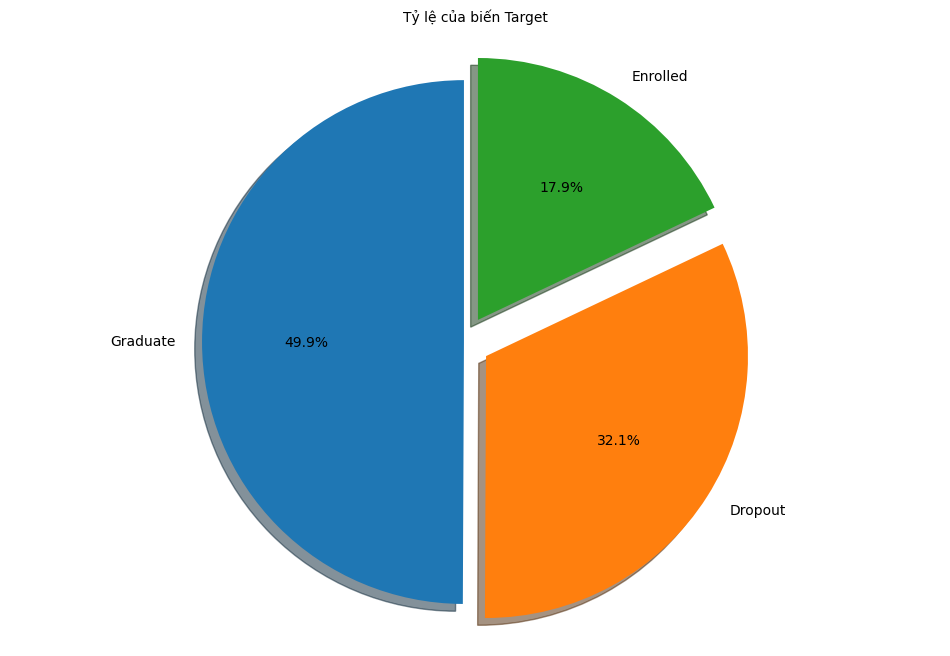

In [ ]:
# Pie chart để hiển thị phần trăm phân phối của biến Target

labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [data.Target[data['Target']=='Graduate'].count(), data.Target[data['Target']=='Dropout'].count(), data.Target[data['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Tỷ lệ của biến Target", size = 10)
plt.show()

*Từ Pie chart ở trên, chúng ta có thể thấy rằng khoảng 49,9% sinh viên là sinh viên sau đại học, 32,1% sinh viên bỏ học và 17,1% sinh viên đang theo học một khóa học khác, điều này cho thấy rằng một nửa số sinh viên trong tổng dân số là sinh viên sau đại học..*

### Xác định ngoại lai

In [ ]:
# Tạo khung dữ liệu riêng cho các biến ngẫu nhiên liên tục.

data_num = data.select_dtypes(include=['float64'])
data_num

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


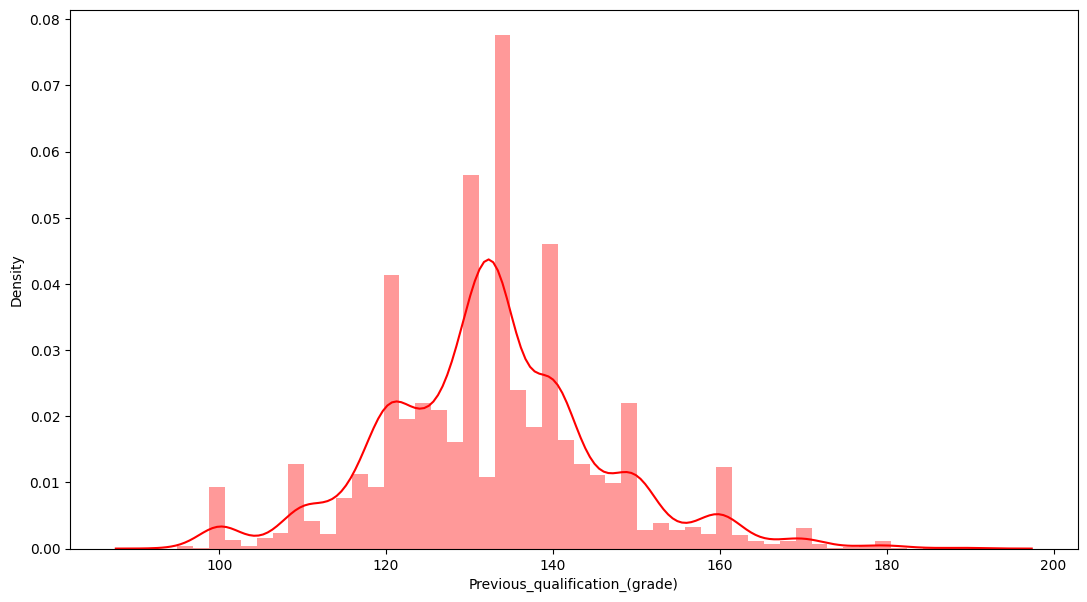

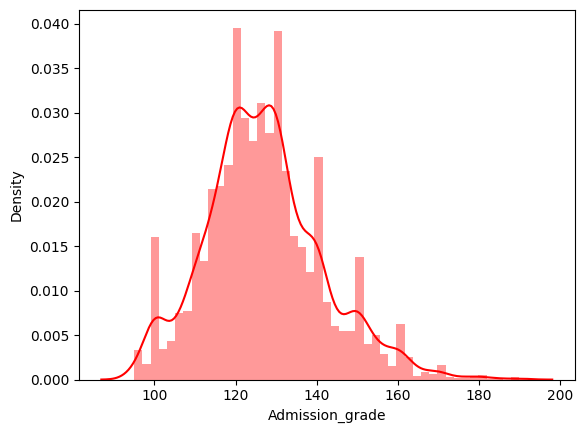

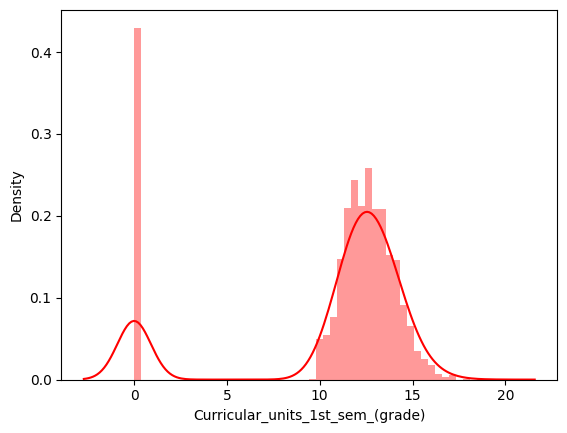

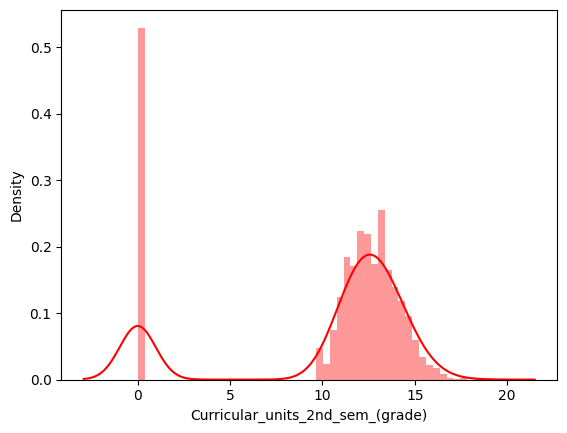

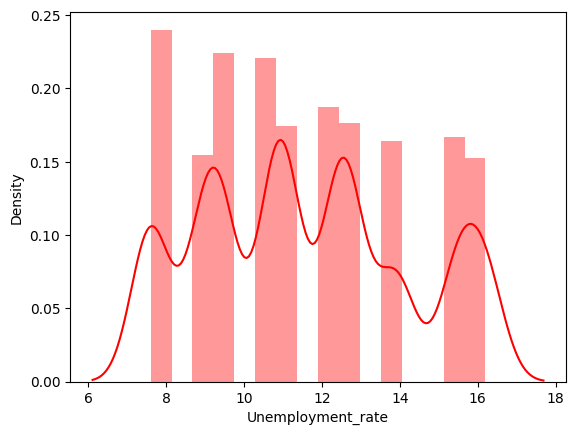

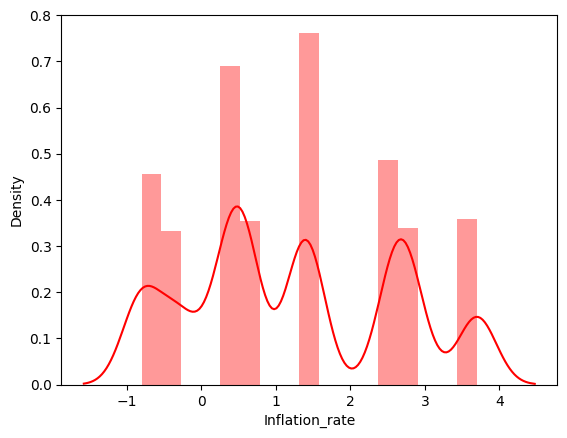

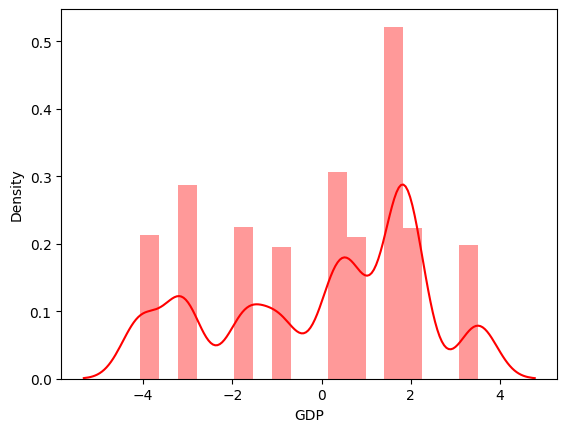

In [ ]:
# Distribution Plot
plt.figure(figsize = (13, 7))

for i in data_num.columns:
    sns.distplot(data[i], color = 'red')
    plt.show()

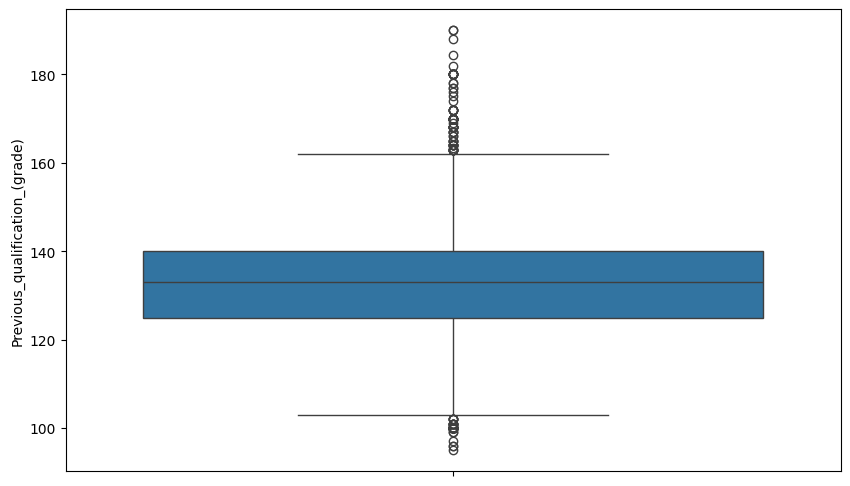

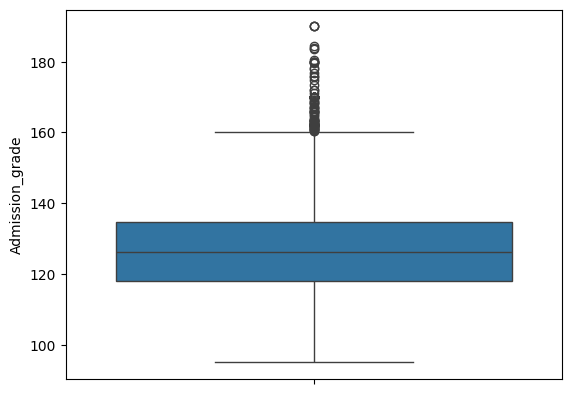

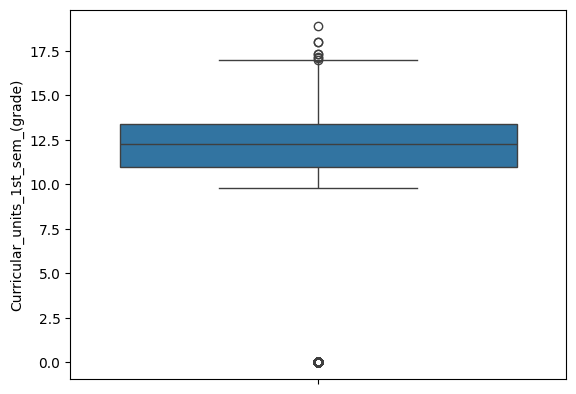

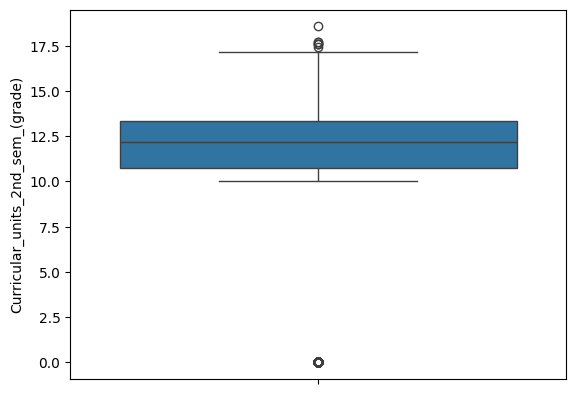

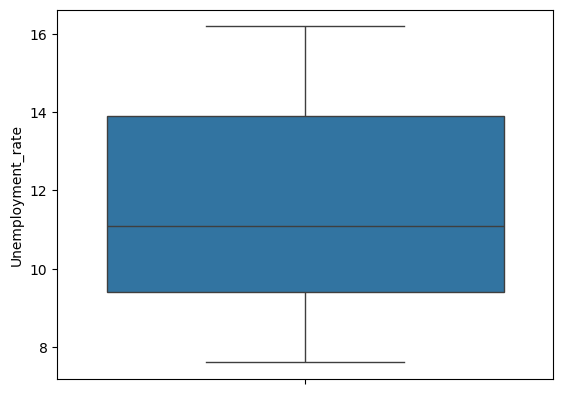

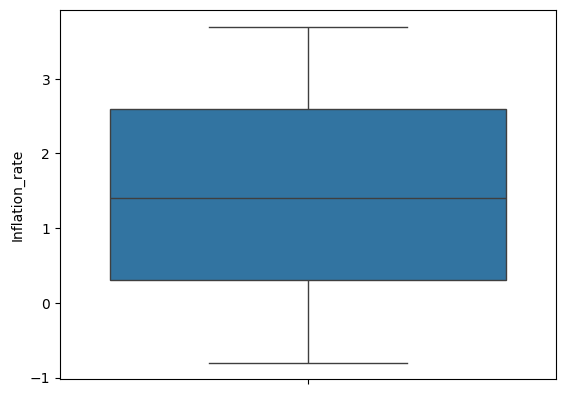

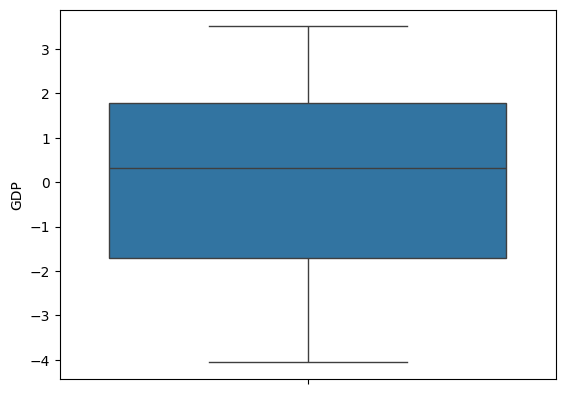

In [ ]:
# BoxPlot
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

*Từ các biểu đồ trên, chúng ta có thể quan sát thấy hầu hết mỗi đặc trưng đều chứa các giá trị ngoại lai. Ngoại trừ Tỷ lệ thất nghiệp, Tỷ lệ lạm phát và GDP.*

### Xử lý ngoại lai bằng IQR

In [ ]:
data_num.columns

Index(['Previous_qualification_(grade)', 'Admission_grade',
       'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

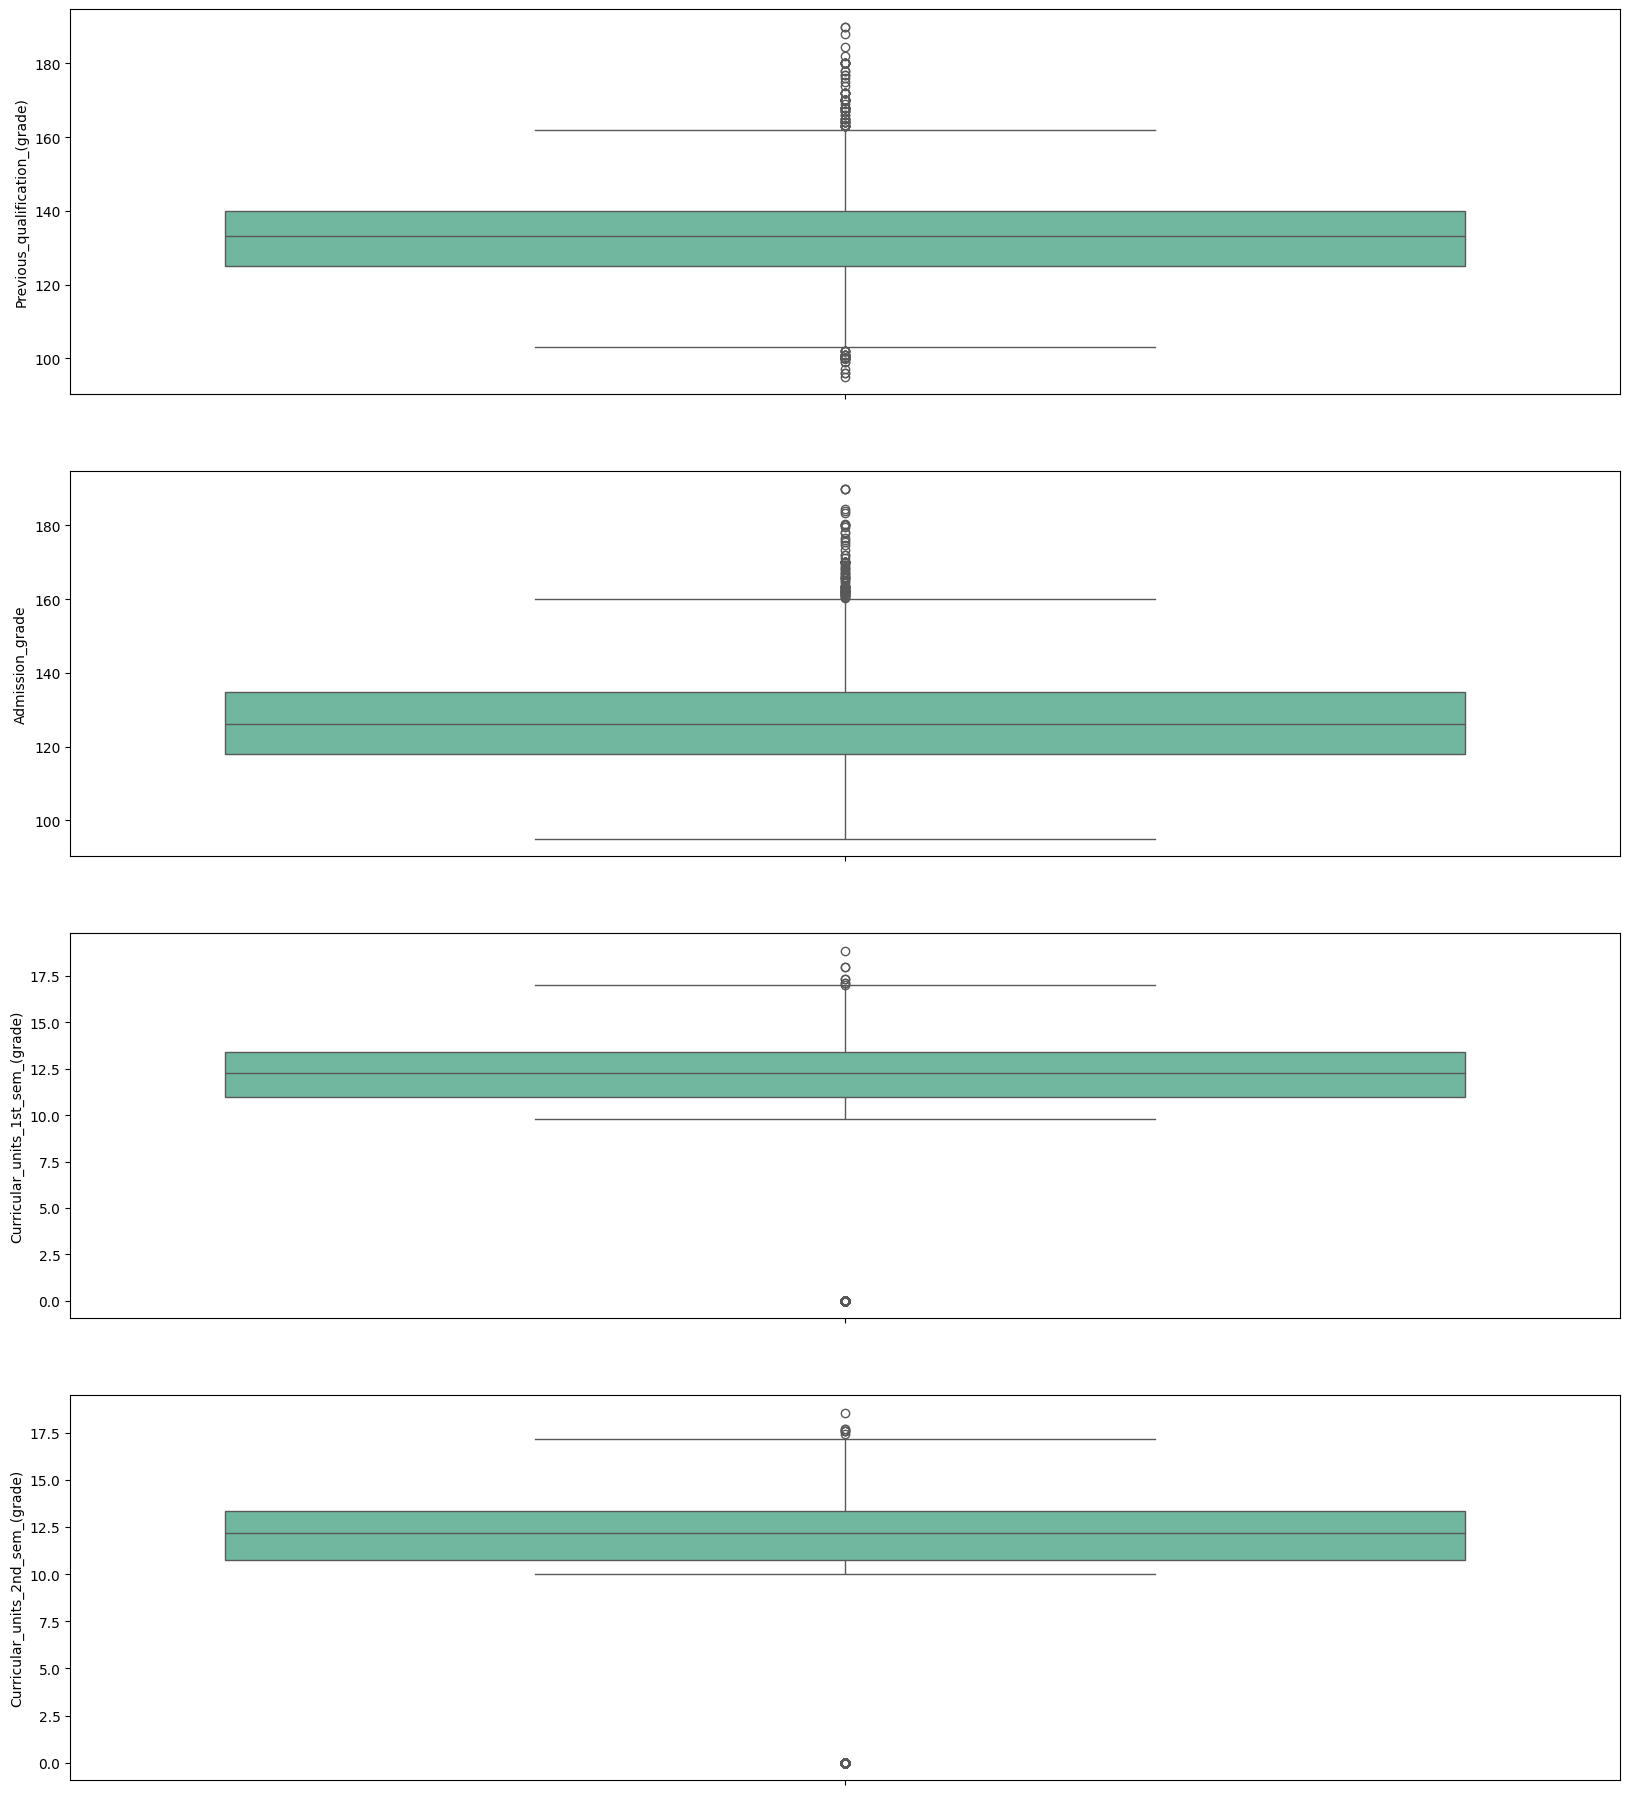

In [ ]:
## Trực quan hóa biểu đồ hộp trước khi xử lý giá trị ngoại lai
fig, axs = plt.subplots(4,1, figsize = (20, 23))
plt1 = sns.boxplot(data['Previous_qualification_(grade)'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(data['Admission_grade'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(data['Curricular_units_1st_sem_(grade)'], ax = axs[2], palette = 'BuGn')
plt1 = sns.boxplot(data['Curricular_units_2nd_sem_(grade)'], ax = axs[3], palette = 'BuGn')

plt.show()

In [ ]:
data[['Previous_qualification_(grade)', 'Admission_grade', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']].describe()

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
count,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206
std,13.188332,14.482001,4.843663,5.210808
min,95.000000,95.000000,0.000000,0.000000
25%,125.000000,117.900000,11.000000,10.750000
50%,133.100000,126.100000,12.285714,12.200000
75%,140.000000,134.800000,13.400000,13.333333
max,190.000000,190.000000,18.875000,18.571429


In [ ]:
# Xử lý ngoại lệ cho Previous_qualification_(grade)

Q1 = data['Previous_qualification_(grade)'].quantile(0.25)
Q3 = data['Previous_qualification_(grade)'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Previous_qualification_(grade)'] >= Q1 - 3*IQR) & (data['Previous_qualification_(grade)'] <= Q3 + 3*IQR)]

In [ ]:
# Xử lý ngoại lệ cho Admission_grade

Q1 = data['Admission_grade'].quantile(0.25)
Q3 = data['Admission_grade'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Admission_grade'] >= Q1 - 3*IQR) & (data['Admission_grade'] <= Q3 + 3*IQR)]

In [ ]:
# Xử lý ngoại lệ cho Curricular_units_1st_sem_(grade)'

Q1 = data['Curricular_units_1st_sem_(grade)'].quantile(0.25)
Q3 = data['Curricular_units_1st_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Curricular_units_1st_sem_(grade)'] >= Q1 - 3*IQR) & (data['Curricular_units_1st_sem_(grade)'] <= Q3 + 3*IQR)]

In [ ]:
# Xử lý ngoại lệ cho Curricular_units_2nd_sem_(grade)'

Q1 = data['Curricular_units_2nd_sem_(grade)'].quantile(0.25)
Q3 = data['Curricular_units_2nd_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Curricular_units_2nd_sem_(grade)'] >= Q1 - 3*IQR) & (data['Curricular_units_2nd_sem_(grade)'] <= Q3 + 3*IQR)]

In [ ]:
data[['Previous_qualification_(grade)', 'Admission_grade', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']].describe()

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
count,3509.000000,3509.000000,3509.000000,3509.000000
mean,132.599231,127.084981,12.749182,12.745582
std,12.977814,13.769560,1.328290,1.372024
min,95.000000,95.000000,10.000000,10.000000
25%,124.000000,118.400000,11.800000,11.750000
50%,133.000000,126.300000,12.666667,12.666667
75%,140.000000,134.500000,13.600000,13.666667
max,184.400000,184.400000,18.875000,18.571429


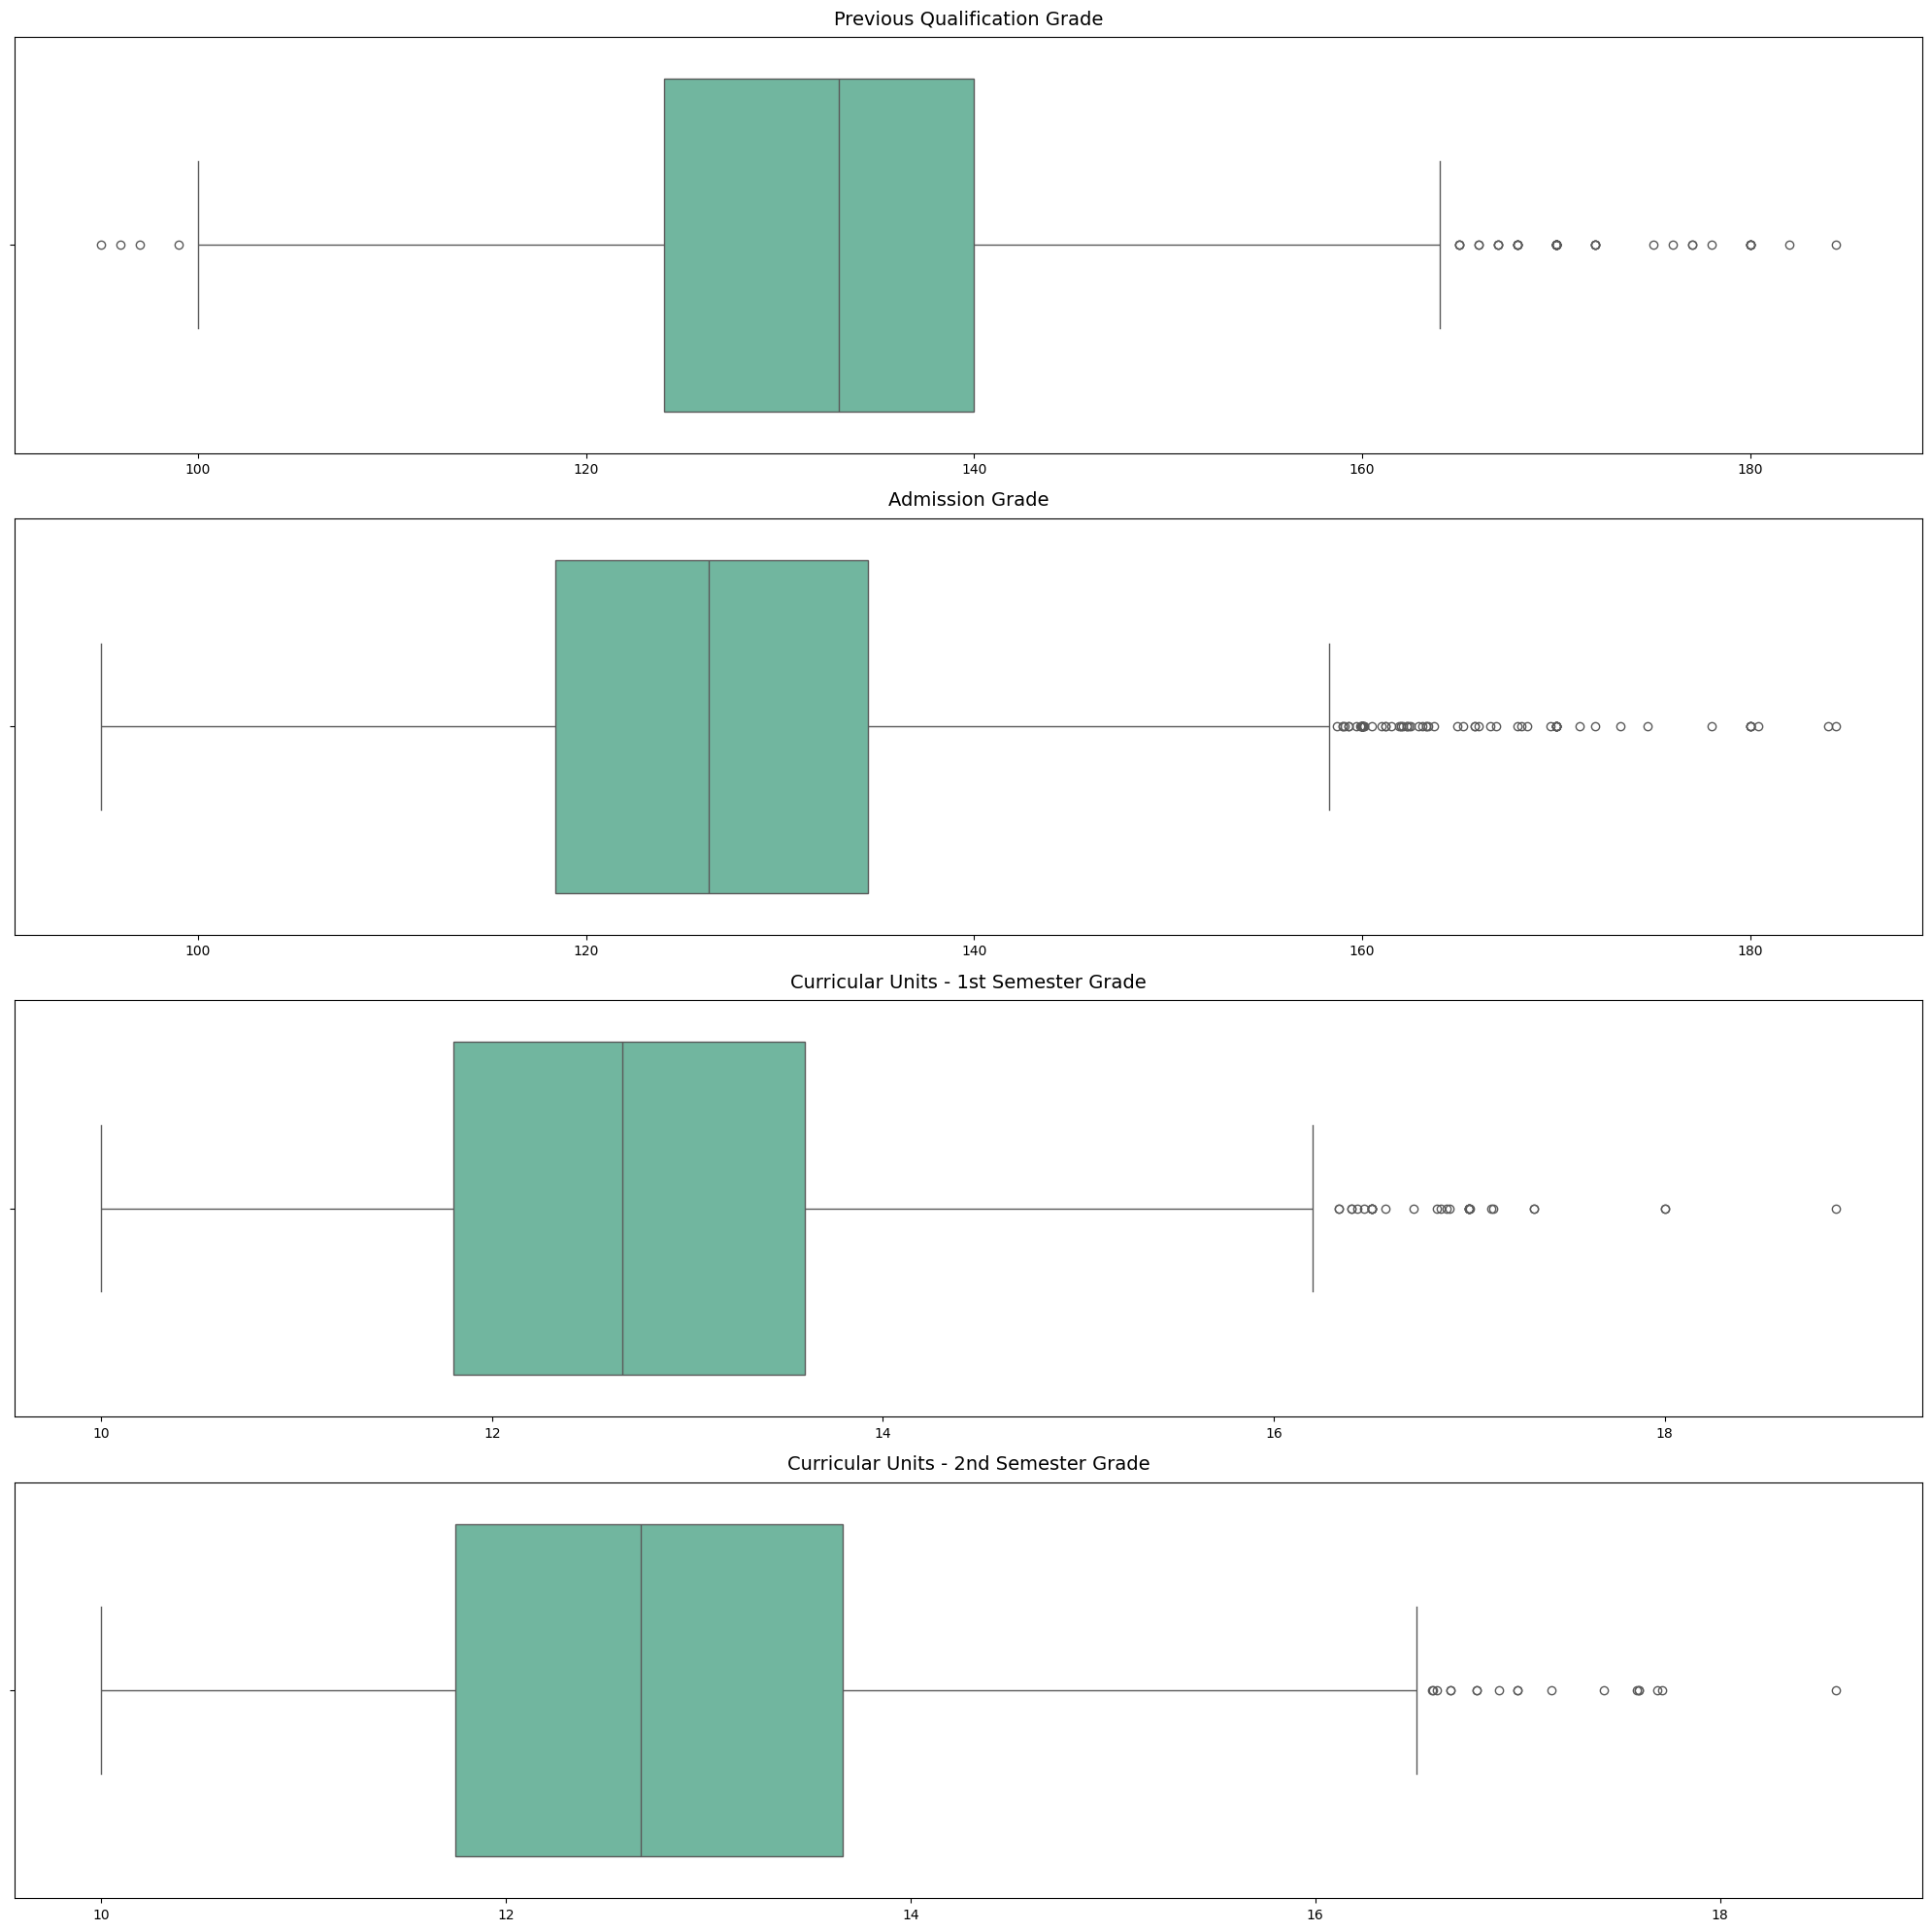

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(20, 20))

# Boxplot 1: Previous_qualification_(grade)
sns.boxplot(x=data['Previous_qualification_(grade)'].values, ax=axs[0], palette='BuGn')
axs[0].set_title('Previous Qualification Grade', fontsize=14, pad=10)  # Thêm tiêu đề

# Boxplot 2: Admission_grade
sns.boxplot(x=data['Admission_grade'].values, ax=axs[1], palette='BuGn')
axs[1].set_title('Admission Grade', fontsize=14, pad=10)

# Boxplot 3: Curricular_units_1st_sem_(grade)
sns.boxplot(x=data['Curricular_units_1st_sem_(grade)'].values, ax=axs[2], palette='BuGn')
axs[2].set_title('Curricular Units - 1st Semester Grade', fontsize=14, pad=10)

# Boxplot 4: Curricular_units_2nd_sem_(grade)
sns.boxplot(x=data['Curricular_units_2nd_sem_(grade)'].values, ax=axs[3], palette='BuGn')
axs[3].set_title('Curricular Units - 2nd Semester Grade', fontsize=14, pad=10)

plt.tight_layout()  # Đảm bảo các tiêu đề không bị chồng lấn
plt.show()

## 2. Tìm mối quan hệ giữa các yếu tố

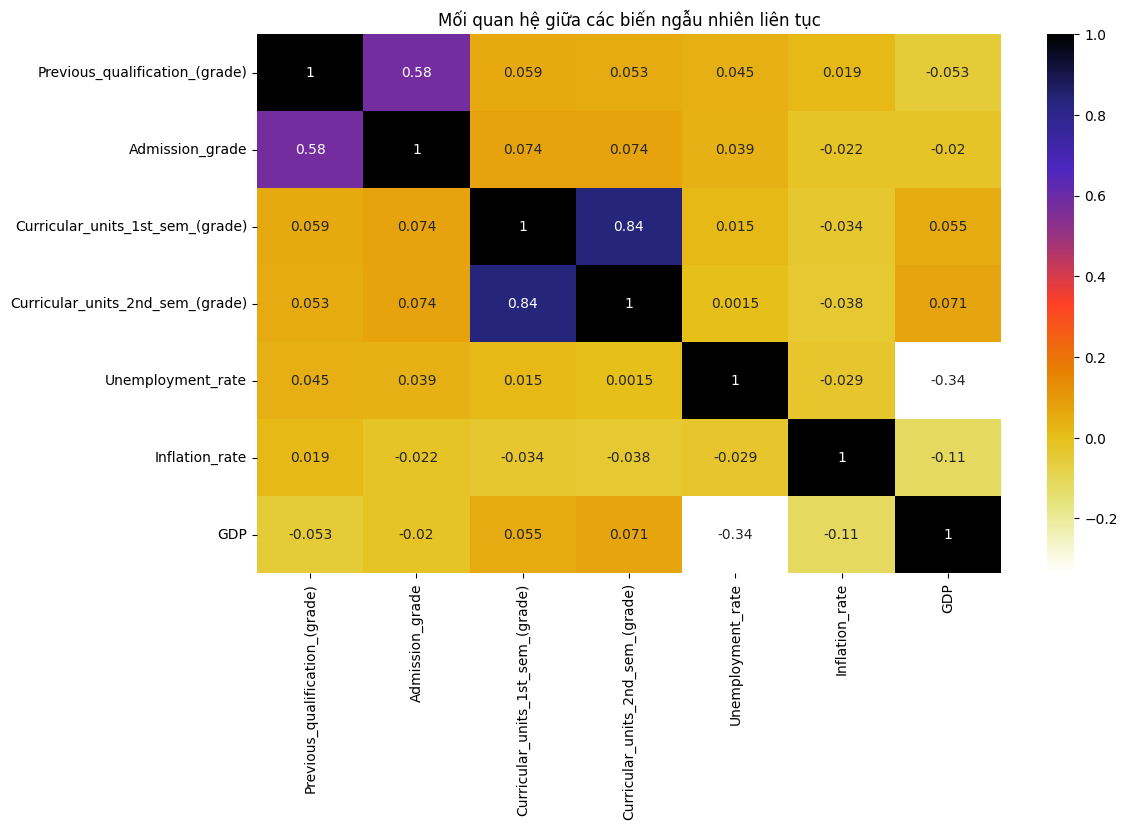

In [ ]:
# Hiển thị mối tương quan giữa các biến số bằng cách sử dụng heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Mối quan hệ giữa các biến ngẫu nhiên liên tục')
plt.show()

*Từ biểu đồ trên, chúng ta có thể quan sát thấy Curricular_units_1st_sem_(grade) & Curricular_units_2nd_sem_(grade) có mối tương quan chặt chẽ với nhau và Previous_qualification_(grade) & Admission_grade có mối quan hệ trung bình giữa chúng, trong khi GDP, tỷ lệ lạm phát và tỷ lệ thất nghiệp có mối quan hệ tiêu cực giữa chún.*




## 3. Phân tích các yếu tố ảnh hưởng đến quyết định bỏ học của sinh viên.

### Bây giờ chúng ta hãy hình dung các biến ngẫu nhiên rời rạc (phân loại).

In [ ]:
# Lấy danh sách các biến ngẫu nhiên liên tục
num_data = [cname for cname in data.columns if data[cname].dtypes in ['float64']]
num_data

['Previous_qualification_(grade)',
 'Admission_grade',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_2nd_sem_(grade)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [ ]:
# Lấy danh sách các biến ngẫu nhiên rời rạc
cat_cols = data._get_numeric_data().columns
cat_cols

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd

In [ ]:
# Phân tách các biến ngẫu nhiên rời rạc và liên tục
cols = list(set(cat_cols) - set(num_data))
cols

['Curricular_units_1st_sem_(enrolled)',
 "Father's_occupation",
 'Gender',
 'Daytime/evening_attendance\t',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Scholarship_holder',
 'Application_order',
 'Educational_special_needs',
 'Marital_status',
 'International',
 'Curricular_units_1st_sem_(credited)',
 'Nacionality',
 'Course',
 'Application_mode',
 "Father's_qualification",
 'Displaced',
 'Curricular_units_2nd_sem_(evaluations)',
 'Tuition_fees_up_to_date',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Curricular_units_1st_sem_(approved)',
 'Curricular_units_2nd_sem_(approved)',
 "Mother's_qualification",
 'Debtor',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_(evaluations)',
 "Mother's_occupation",
 'Previous_qualification',
 'Curricular_units_2nd_sem_(enrolled)',
 'Curricular_units_2nd_sem_(credited)']

In [ ]:
len(cols)

29

In [ ]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate


### Bây giờ chúng ta hãy hình dung Dữ liệu phân loại

#### Phân tích đơn biến và phân tích song biến

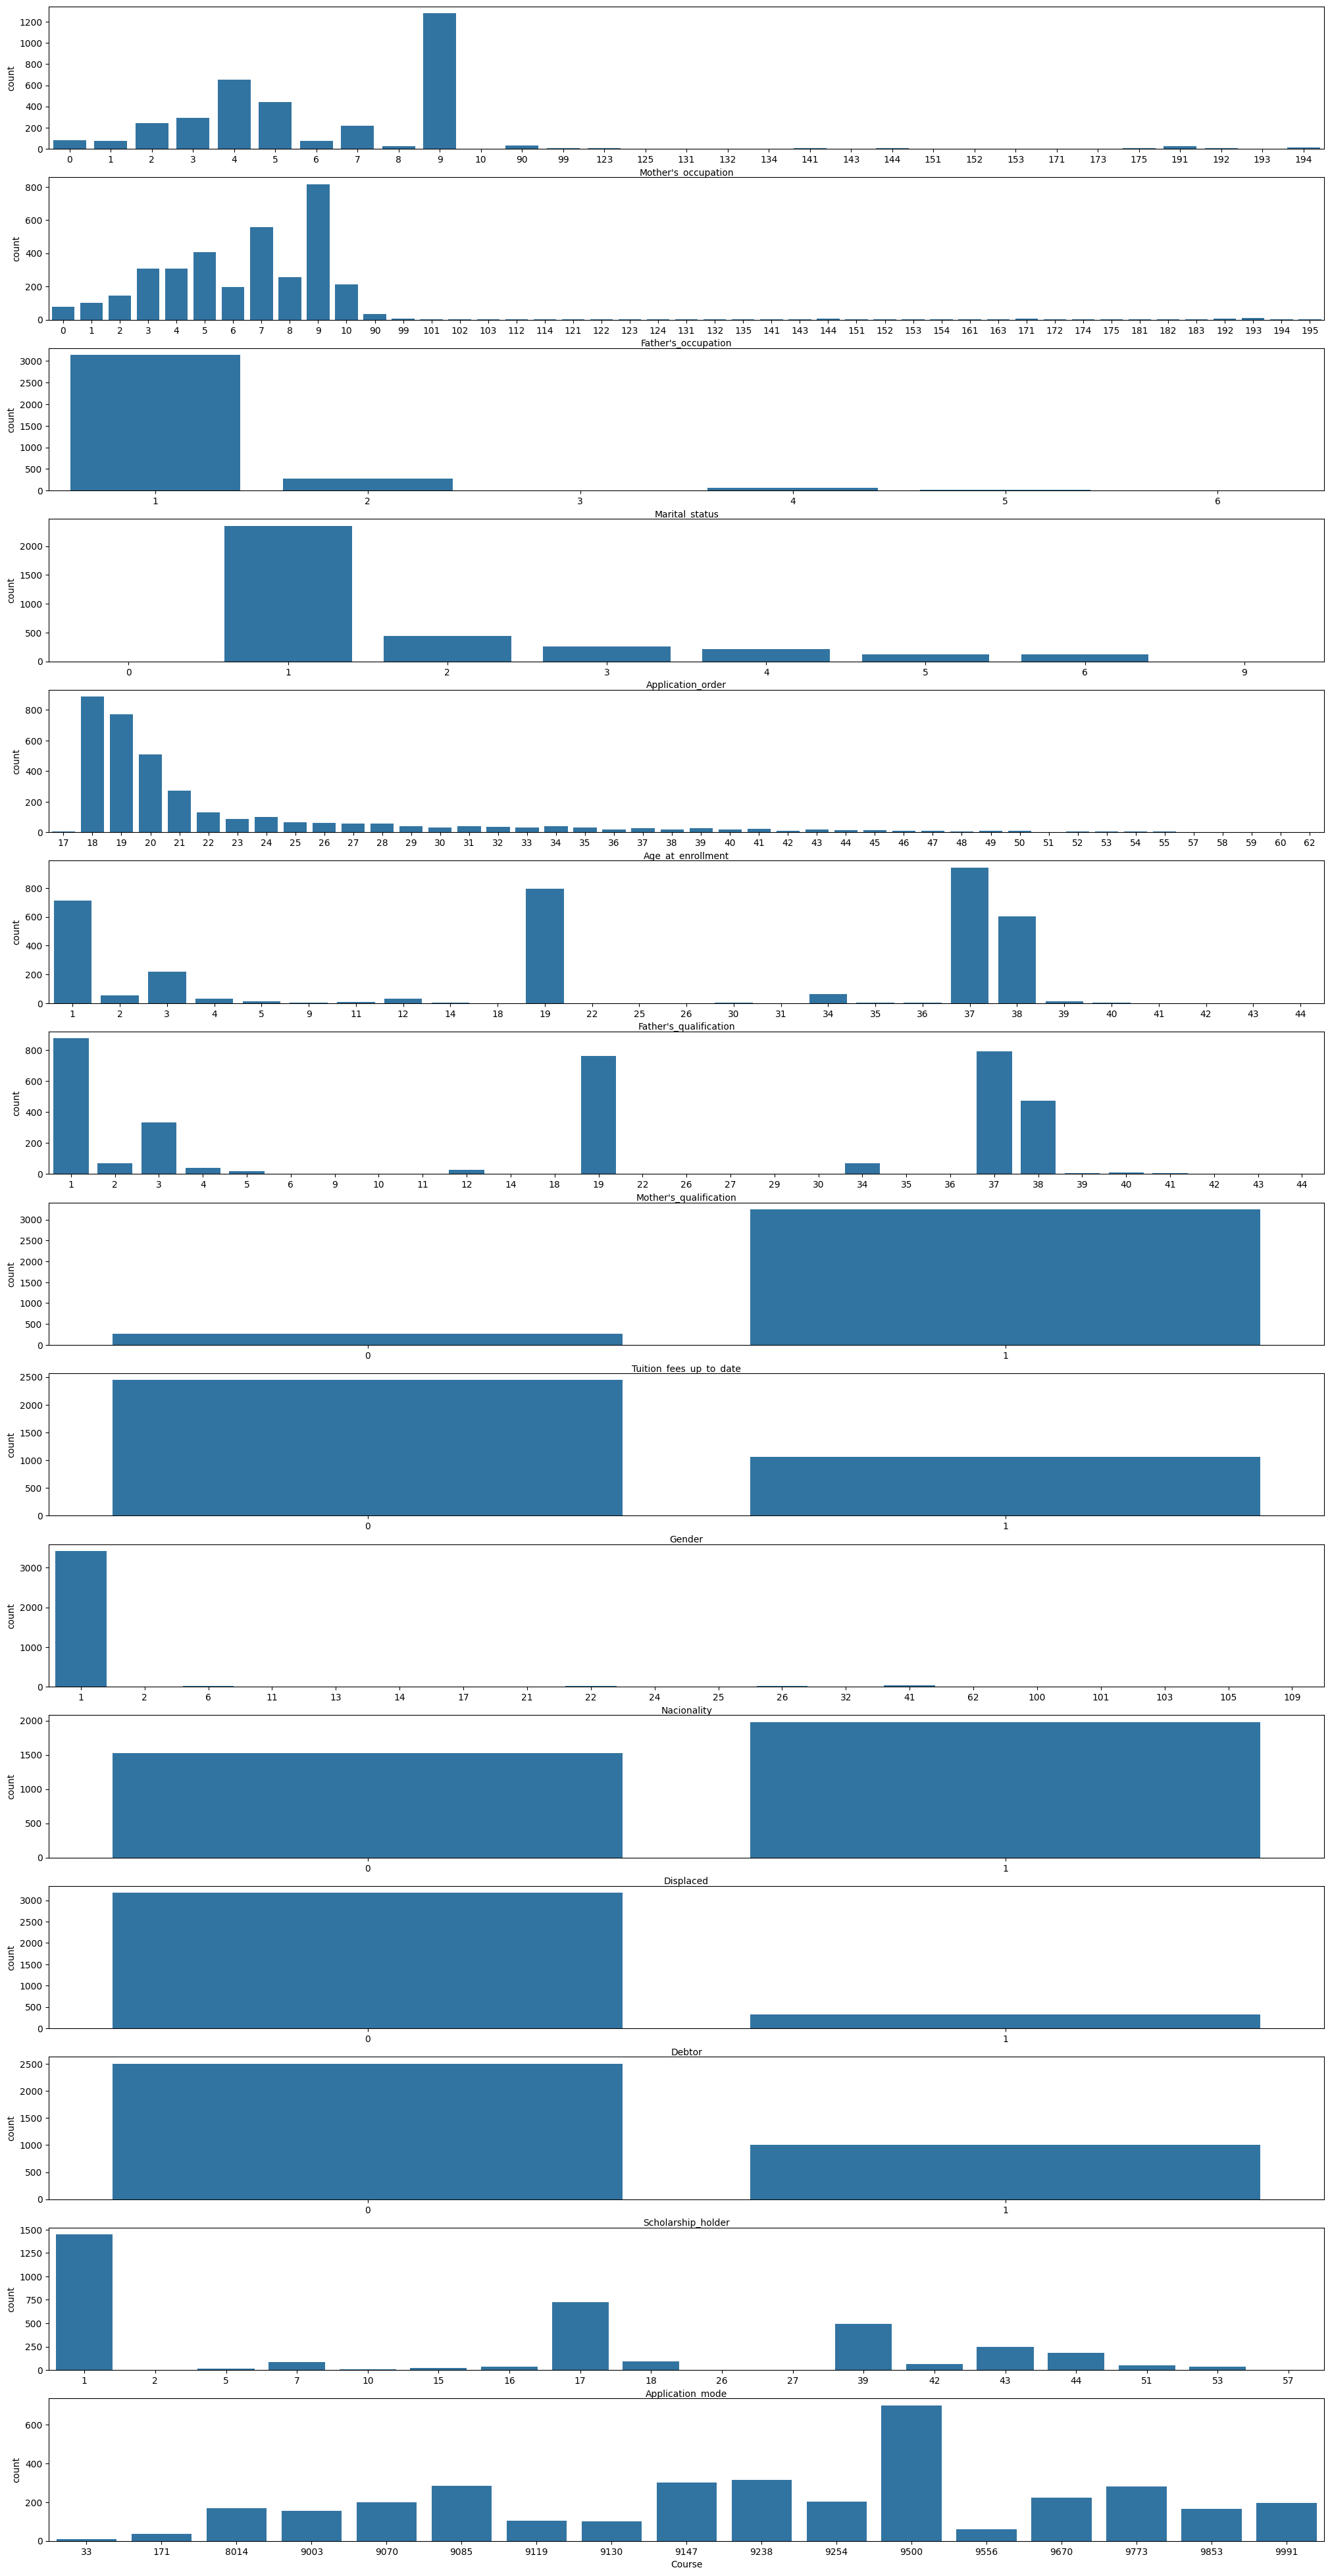

In [ ]:
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(25, 50))

cols_ = ["Mother's_occupation",
 "Father's_occupation",
 'Marital_status',
 'Application_order',
 'Age_at_enrollment',
 "Father's_qualification",
 "Mother's_qualification",
 'Tuition_fees_up_to_date',
 'Gender',
  "Nacionality",
 'Displaced',
 'Debtor',
 "Scholarship_holder",
 'Application_mode',
 'Course']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data, ax=ax[ind])

### Thông tin chi tiết

1. Hầu hết các bà mẹ thực sự là công nhân không có tay nghề, tiếp theo là nhân viên hành chính, nhân viên an toàn và người bán hàng.
2. Hầu hết các ông bố của sinh viên là công nhân không có tay nghề, tiếp theo là công nhân có tay nghề trong ngành, nhân viên an toàn, nhân viên an ninh và người bán hàng.
3. Hơn 90% sinh viên trong tập dữ liệu được đưa ra là độc thân.
4. Hầu hết các sinh viên được ghi danh ở độ tuổi 18, 19 và 20.
5. Hầu hết các bậc cha mẹ có trình độ học vấn rất cơ bản bắt đầu từ lớp 5 đến lớp 12.
6. Hơn 90% sinh viên nộp học phí đúng hạn.
7. Trong nhóm sinh viên này, hơn 60% là nữ.
8. Hầu như mọi sinh viên trong nhóm này đều là người Bồ Đào Nha.
9. Hầu hết các sinh viên trong nhóm này không phải là người nhận học bổng,
10. Hầu hết các sinh viên trong nhóm được theo dõi giai đoạn 1 của chế độ nộp đơn, sau đó là giai đoạn 2.
11. Hầu hết sinh viên đăng ký học ngành Điều dưỡng, sau đó là ngành quản lý, dịch vụ xã hội, báo chí và truyền thông.

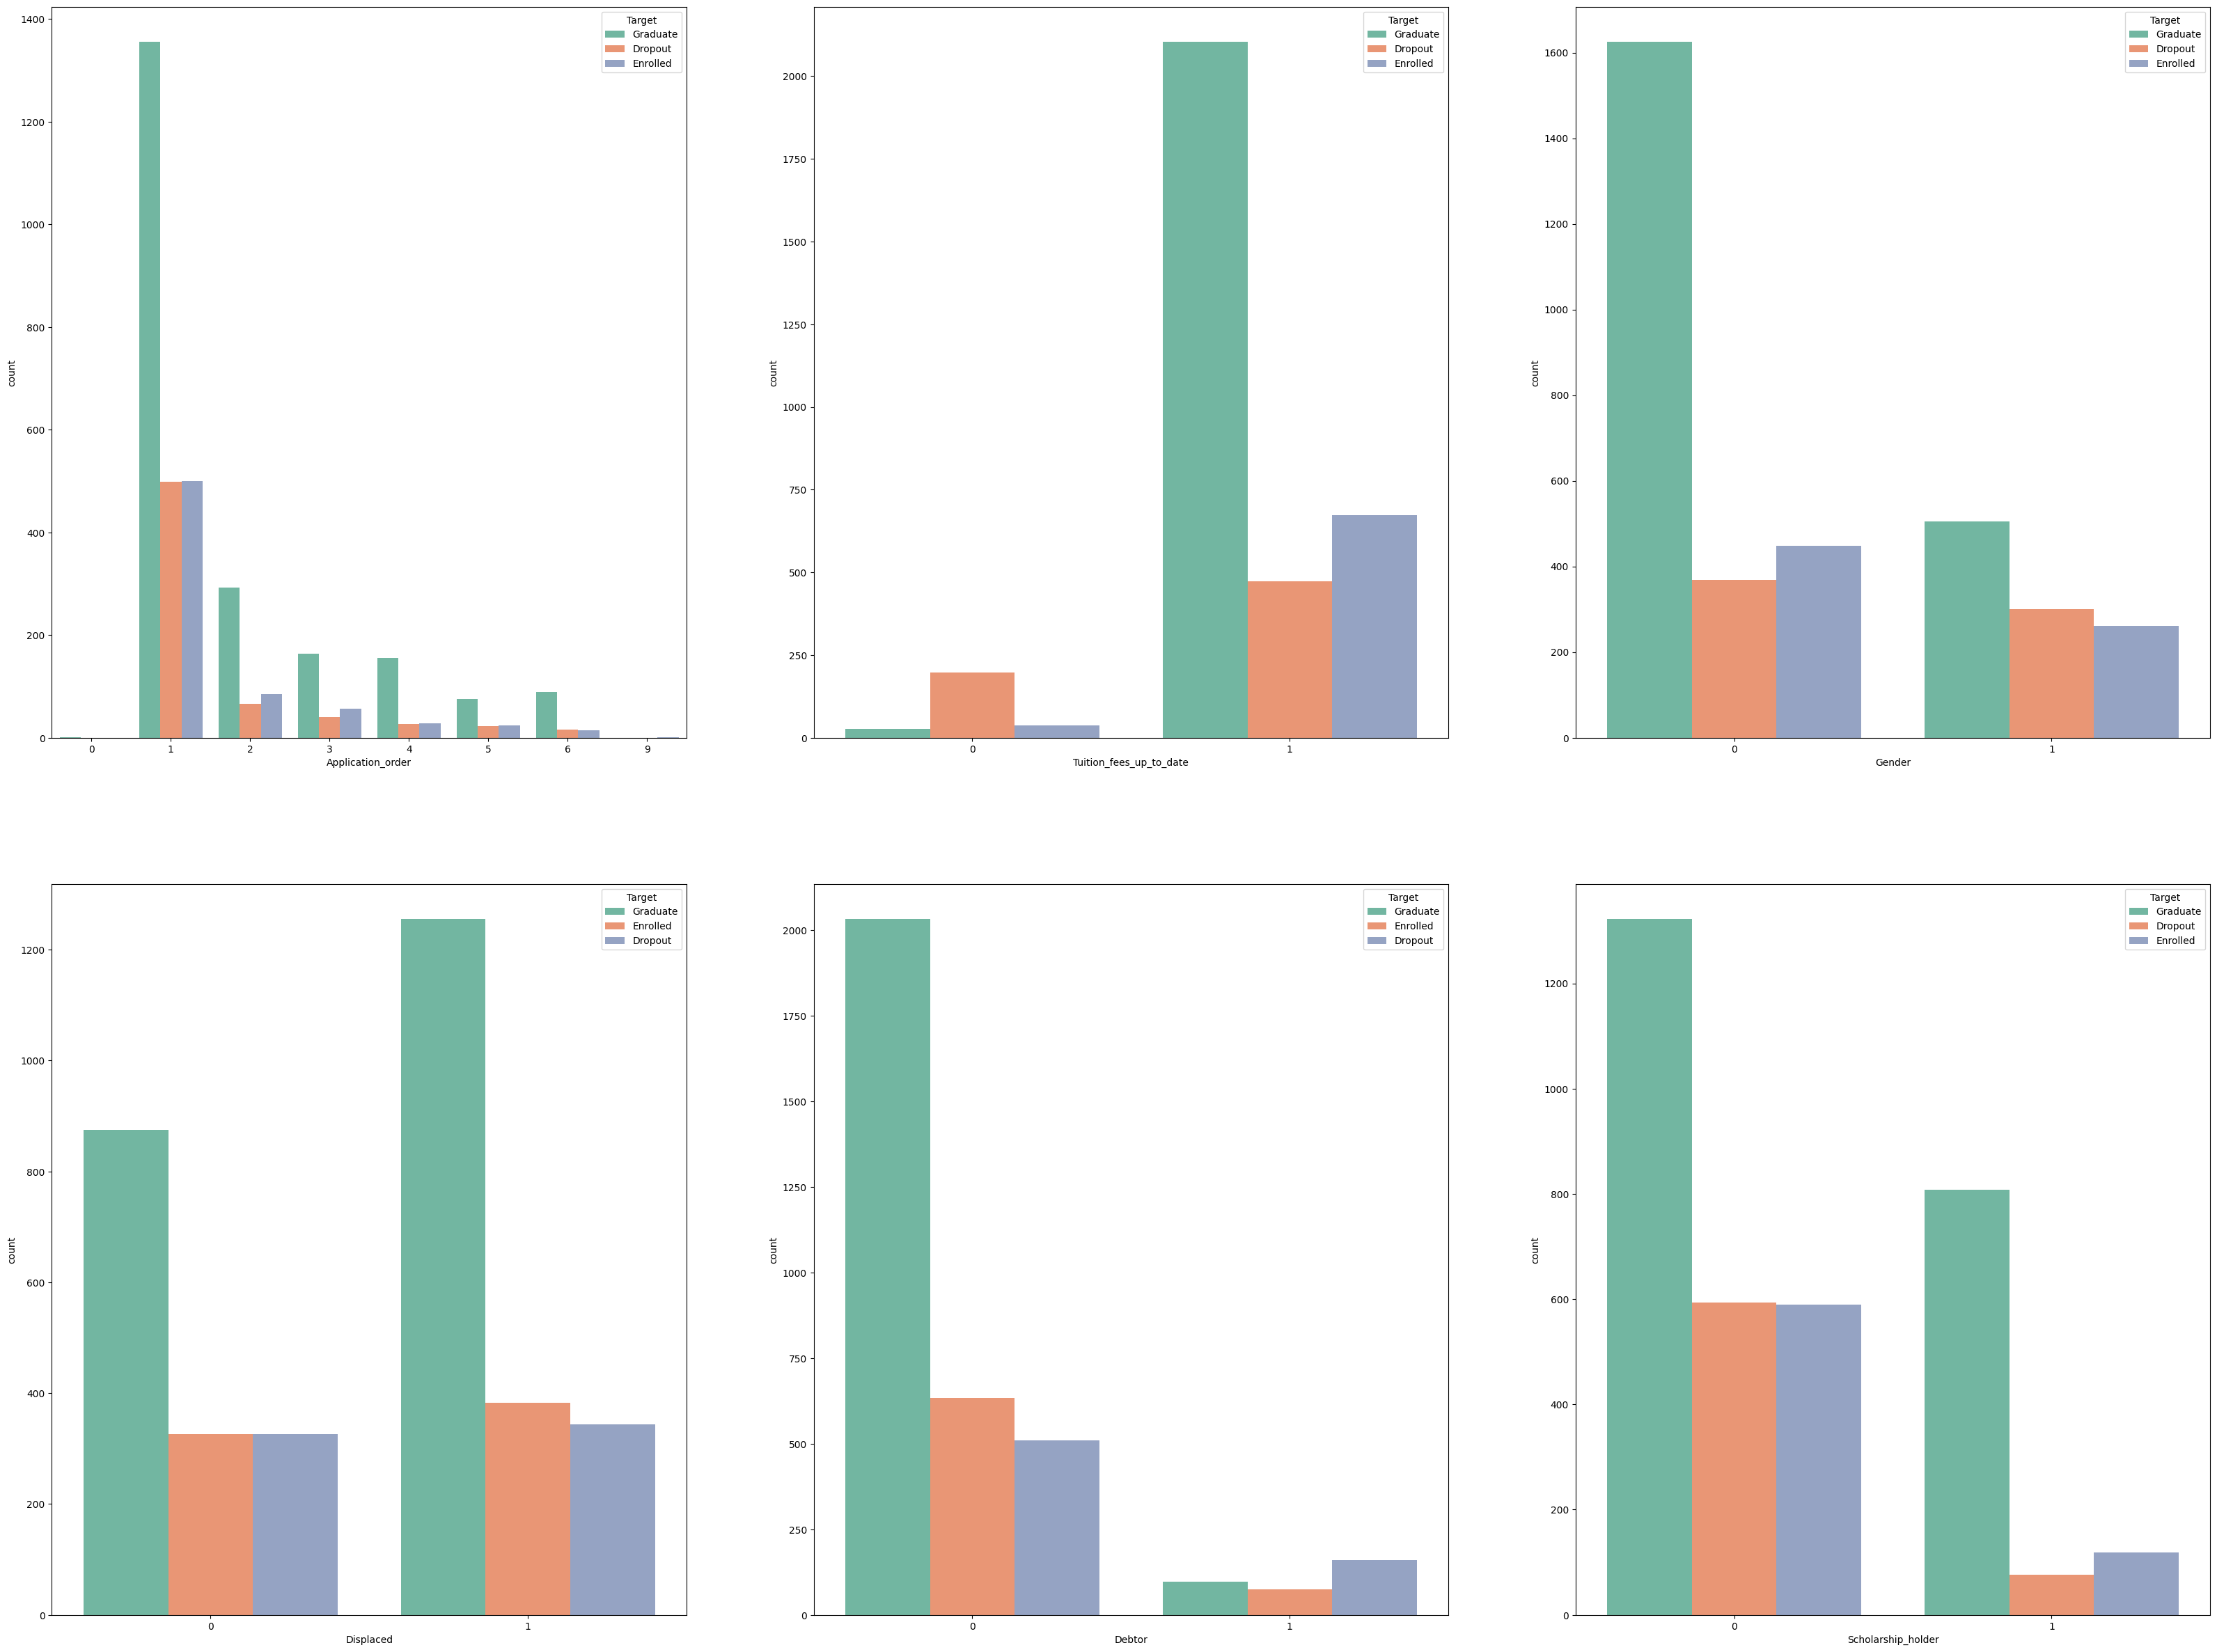

In [ ]:
# phân tích tác động của từng biến trên lên biến Target

fig, ax = plt.subplots(2, 3, figsize=(40, 30))

sns.countplot(x='Application_order', hue='Target', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Tuition_fees_up_to_date', hue='Target', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='Gender', hue='Target', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='Displaced', hue='Target', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='Debtor', hue='Target', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Scholarship_holder', hue='Target', data=data, palette='Set2', ax=ax[1][2])


plt.show()

### Thông tin chi tiết

1. Chúng ta có thể quan sát ở đây rằng những sinh viên không nộp học phí đúng hạn có nguy cơ bỏ học cao hơn.
2. Hầu hết nam sinh bỏ học.
3. Những sinh viên mắc nợ có nguy cơ bỏ học cao hơn.

### Kiểm định thống kê ảnh hưởng của các yếu tố rời rạc đến quyết định bỏ học

Vì chúng ta có 29 dữ liệu rời rạc (phân loại), nên chúng ta cần thực hiện kiểm định giả thuyết để hiểu liệu có bất kỳ mối quan hệ nào giữa các biến phụ thuộc và biến độc lập hay không và sau đó chúng ta có thể phân tích loại mối quan hệ đó bằng biểu đồ.
Hãy thực hiện kiểm định Chi-Square để hiểu mối quan hệ giữa biến mục tiêu và biến độc lập.

In [ ]:
#chia tập dữ liệu df thành biến đầu vào và biến mục tiêu

X = data[['Curricular_units_2nd_sem_(enrolled)',
 'Scholarship_holder',
 'Application_order',
 'Curricular_units_1st_sem_(evaluations)',
 'Application_mode',
 'Course',
 'Nacionality',
 'Curricular_units_1st_sem_(without_evaluations)',
 'International',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_(credited)',
 'Curricular_units_2nd_sem_(credited)',
 'Debtor',
 'Daytime/evening_attendance\t',
 'Marital_status',
 'Previous_qualification',
 "Mother's_qualification",
 'Curricular_units_1st_sem_(approved)',
 "Mother's_occupation",
 'Gender',
 'Displaced',
 'Curricular_units_2nd_sem_(evaluations)',
 'Tuition_fees_up_to_date',
 'Educational_special_needs',
 "Father's_qualification",
 'Curricular_units_2nd_sem_(approved)',
 'Curricular_units_1st_sem_(enrolled)',
 "Father's_occupation"]]

y = data['Target']

In [ ]:
# Thực hiện kiểm định Chi-Square
f_score = chi2(X, y)

In [ ]:
# Tạo chuỗi p-value tương ứng
p_value = pd.Series(f_score[1], index=X.columns)
p_value = p_value.sort_values(ascending=True)

for feature, p in p_value.items():
    print(f"{feature:<45}: {p:.10f}")

Application_mode                             : 0.0000000000
Mother's_occupation                          : 0.0000000000
Father's_occupation                          : 0.0000000000
Curricular_units_2nd_sem_(approved)          : 0.0000000000
Curricular_units_1st_sem_(approved)          : 0.0000000000
Previous_qualification                       : 0.0000000000
Age_at_enrollment                            : 0.0000000000
Curricular_units_2nd_sem_(evaluations)       : 0.0000000000
Curricular_units_1st_sem_(evaluations)       : 0.0000000000
Debtor                                       : 0.0000000000
Course                                       : 0.0000000000
Curricular_units_1st_sem_(credited)          : 0.0000000000
Scholarship_holder                           : 0.0000000000
Mother's_qualification                       : 0.0000000000
Curricular_units_2nd_sem_(credited)          : 0.0000000000
Gender                                       : 0.0000000000
Curricular_units_2nd_sem_(without_evalua

#### **Theo Chi-Square (Kiểm định tính độc lập)**

1. Giả thuyết không (H₀) → Các đặc trưng là độc lập với nhau (không có mối quan hệ giữa biến mục tiêu và đặc trưng đầu vào).
2. Giả thuyết đối (H₁) → Các đặc trưng là phụ thuộc lẫn nhau (có mối quan hệ giữa biến mục tiêu và đặc trưng đầu vào).

* Nếu giá trị p ≥ 0.05, không thể bác bỏ giả thuyết H₀ → tức là không có mối quan hệ đáng kể giữa biến mục tiêu và đặc trưng đầu vào → đặc trưng không ảnh hưởng đến biến mục tiêu.

* Nếu giá trị p < 0.05, bác bỏ giả thuyết H₀ → tức là có mối quan hệ thống kê đáng kể giữa đặc trưng đầu vào và biến mục tiêu → đặc trưng có ảnh hưởng đến biến mục tiêu.

In [ ]:
i_cols=[]
significance_level = 0.05
for i in p_value.index:
    if p_value[i] <= significance_level:
        print(f"{i:<45}  ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)")
    else:
        print(f"{i:<45}  ==>  ✅ Chấp nhận giả thuyết H0 (không liên quan đến Target)")
        i_cols.append(i)

Application_mode                               ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Mother's_occupation                            ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Father's_occupation                            ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Curricular_units_2nd_sem_(approved)            ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Curricular_units_1st_sem_(approved)            ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Previous_qualification                         ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Age_at_enrollment                              ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Curricular_units_2nd_sem_(evaluations)         ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Curricular_units_1st_sem_(evaluations)         ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Debtor                                         ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đế

In [ ]:
# Danh sách các đặc trưng không có ý nghĩa thống kê
print("\nCác đặc trưng sẽ bị loại bỏ vì không có ý nghĩa:")
print(i_cols)


Các đặc trưng sẽ bị loại bỏ vì không có ý nghĩa:
['Marital_status', 'Daytime/evening_attendance\t', 'Educational_special_needs', 'International']


*Từ kiểm định Chi-Square, chúng ta có thể quan sát thấy chỉ có 4 đặc điểm không liên quan đến các biến mục tiêu, do đó chúng ta có thể loại bỏ các đặc điểm đó và phân tích các đặc điểm còn lại.*

In [ ]:
# Loại bỏ các đặc trưng không liên quan
data.drop(labels=i_cols, axis=1, inplace=True)

In [ ]:
data.head()

,Application_mode,Application_order,Course,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
1,15,1,9254,1,160.0,1,1,3,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
3,17,2,9773,1,122.0,1,38,37,5,3,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,39,1,8014,1,100.0,1,37,38,9,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,39,1,9991,19,133.1,1,37,37,9,7,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,9500,1,142.0,1,19,38,7,10,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate


## 4. Phân tích mối quan hệ giữa điểm số và tỷ lệ bỏ học

###Xác định các biến điểm số
Trong dataset, các biến liên quan đến điểm số gồm:

Previous_qualification_grade(Từ 0 đến 200)

Admission_grade (Từ 0 đến 200)

Curricular_units_1st_sem_grade (Từ 0 đến 20)

Curricular_units_2nd_sem_grade(Từ 0 đến 20)


In [ ]:
# Chuyển đổi biến mục tiêu thành dữ liệu số
le =LabelEncoder()

data['Target'] = le.fit_transform(data['Target'])

###Kiểm định ANOVA

1. Giả thuyết không (H₀) → Không có sự khác biệt trung bình điểm số giữa các nhóm Target. Tức là: Điểm số không ảnh hưởng đến nguy cơ bỏ học.
2. Giả thuyết đối (H₁) → Có sự khác biệt trung bình điểm số giữa ít nhất 2 nhóm Target. Tức là: Điểm số có ảnh hưởng đến nguy cơ bỏ học.


*	Nếu p-value < 0.05 → Bác bỏ H₀ → Điểm số có ảnh hưởng đến Target.
*	Nếu p-value ≥ 0.05 → Không bác bỏ H₀ → Điểm số không ảnh hưởng đến Target (có thể loại bỏ).


In [ ]:
data_num['Target']=data['Target']
print(data_num.columns.tolist())

['Previous_qualification_(grade)', 'Admission_grade', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target']


In [ ]:
# Danh sách các cột điểm số
score_cols = ['Previous_qualification_(grade)', 'Admission_grade',
              'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']

# Khởi tạo dictionary lưu p-value cho từng biến
p_values = {}

# Thực hiện kiểm định ANOVA cho từng biến
for col in score_cols:
    dropout = data_num[data_num['Target'] == 0][col]
    enrolled = data_num[data_num['Target'] == 1][col]
    graduate = data_num[data_num['Target'] == 2][col]

    f_stat, p_value = f_oneway(dropout, enrolled, graduate)
    p_values[col] = p_value  # lưu p-value vào dictionary

# Chuyển p-value thành Series để dễ xử lý
p_value_series = pd.Series(p_values).sort_values(ascending=True)

# In ra p-value
print("\n📋 Bảng p-value cho từng biến điểm số:")
for feature, p in p_value_series.items():
    print(f"{feature:<45}: {p:.10f}")

# Đánh giá ý nghĩa thống kê
print("\n=== 🔍 Đánh giá kết quả kiểm định ANOVA ===")
significance_level = 0.05
i_cols = []

for feature in p_value_series.index:
    if p_value_series[feature] <= significance_level:
        print(f"{feature:<45} ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)")
    else:
        print(f"{feature:<45} ==>  ✅ Chấp nhận giả thuyết H0 (không liên quan đến Target)")
        i_cols.append(feature)




📋 Bảng p-value cho từng biến điểm số:
Curricular_units_2nd_sem_(grade)             : 0.0000000000
Curricular_units_1st_sem_(grade)             : 0.0000000000
Previous_qualification_(grade)               : 0.0000000000
Admission_grade                              : 0.0000000001

=== 🔍 Đánh giá kết quả kiểm định ANOVA ===
Curricular_units_2nd_sem_(grade)              ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Curricular_units_1st_sem_(grade)              ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Previous_qualification_(grade)                ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)
Admission_grade                               ==>  ❌ Bác bỏ giả thuyết H0 (có liên quan đến Target)


Cả 4 biến đều có p-value = 0.0000 (rất nhỏ, < 0.05).

Có sự khác biệt trung bình điểm số giữa các nhóm Target (Dropout, Enrolled, Graduate) đối với tất cả các biến.

Kết luận:
Điểm số của sinh viên có mối liên hệ chặt chẽ với nguy cơ bỏ học.

###Phân tích bỏ học theo từng yếu tố (đơn biến)

####Previous_qualification_(grade)

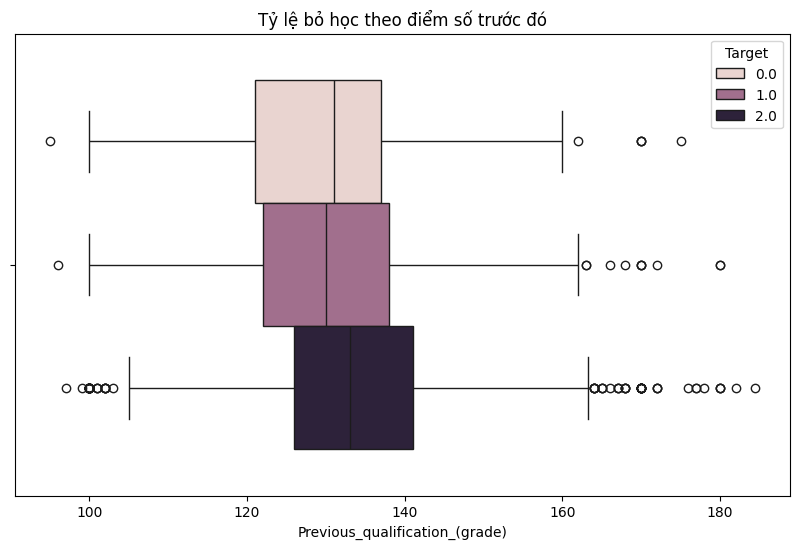

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Previous_qualification_(grade)', hue='Target', data=data_num)
plt.title('Tỷ lệ bỏ học theo điểm số trước đó')
plt.show()


#####Nhận xét


1.   Nhóm Graduate có điểm nền tảng cao hơn rõ rệt so với nhóm Dropout.
2.   Dropout có nhiều giá trị thấp hơn (và có độ phân tán lớn hơn), cho thấy học lực đầu vào thấp là yếu tố tiềm ẩn dẫn đến bỏ học.






####Admission_grade

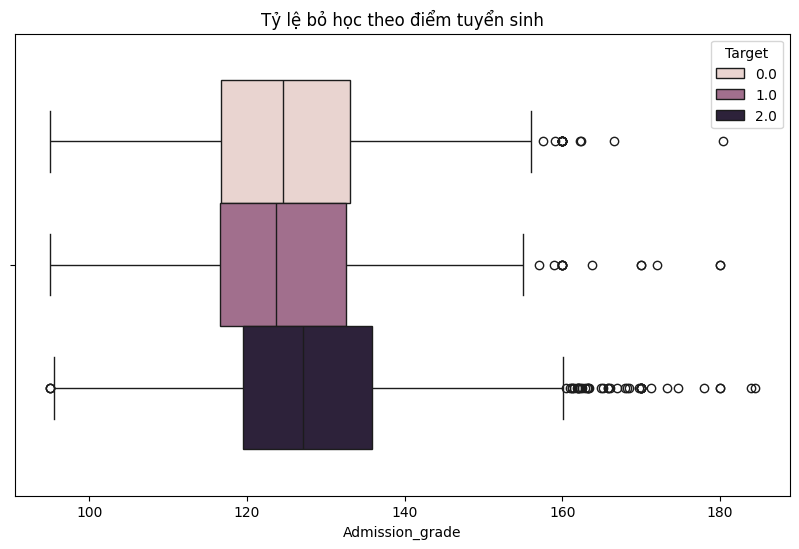

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission_grade', hue='Target', data=data_num)
plt.title('Tỷ lệ bỏ học theo điểm tuyển sinh')
plt.show()

#####Nhận xét


1.   Nhóm Graduate có điểm trung bình đầu vào cao hơn rõ rệt so với nhóm Dropout.
2.   Tuy nhiên, sự khác biệt giữa các nhóm không rõ ràng






####Curicular_units_1st_sem_(grade)

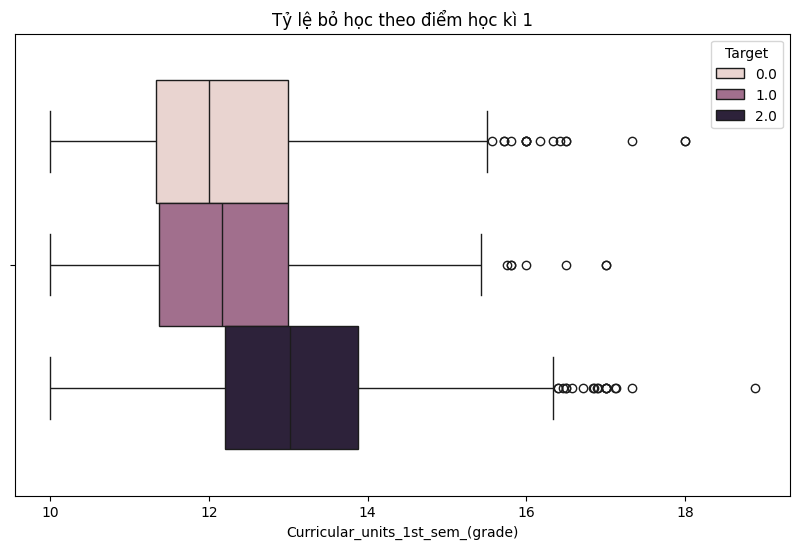

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Curricular_units_1st_sem_(grade)', hue='Target', data=data_num)
plt.title('Tỷ lệ bỏ học theo điểm học kì 1')
plt.show()

#####Nhận xét


1.   Dropout có điểm rất thấp, nhiều giá trị sát đáy.
2.   Graduate lại có điểm cao và ổn định hơn






####Curicular_units_2nd_sem_(grade)

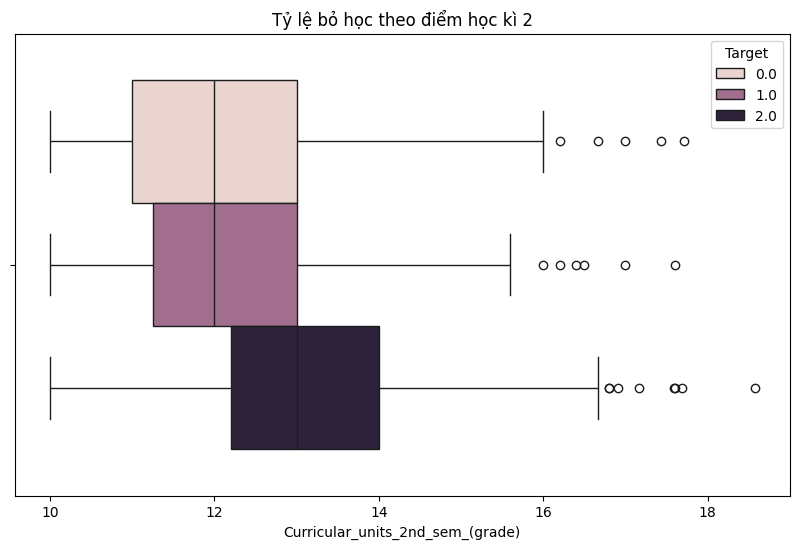

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Curricular_units_2nd_sem_(grade)', hue='Target', data=data_num)
plt.title('Tỷ lệ bỏ học theo điểm học kì 2')
plt.show()

#####Nhận xét


1.   Graduate cao nhất, Dropout thấp nhất.
2.   Tương tự điểm học kì 1 Graduate lại điểm cao và ổn định hơn





###Phân tích phân phối

####Previous_qualification_(grade)

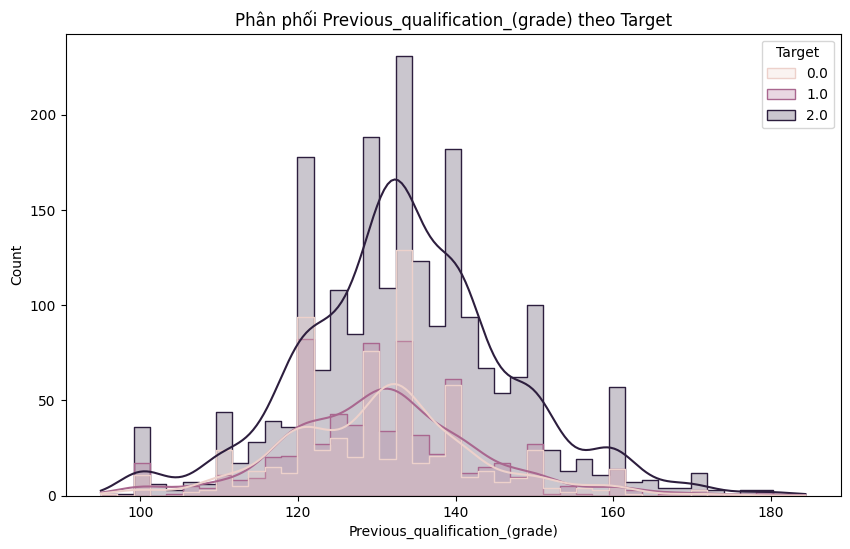

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_num, x= 'Previous_qualification_(grade)', hue='Target', kde=True, element="step")
plt.title(f'Phân phối Previous_qualification_(grade) theo Target')
plt.show()

#####Nhận xét


1.   Sinh viên tốt nghiệp có điểm Previous_qualification_(grade) cao hơn sinh viên bỏ học rõ rệt, chủ yếu tập trung trên 130 điểm.
2.   Sinh viên bỏ học có điểm nền tảng thấp hơn, đa phần tập trung dưới 130 điểm.
3.   Điểm số nền tảng càng cao thì khả năng tốt nghiệp càng cao.






####Admission_grade

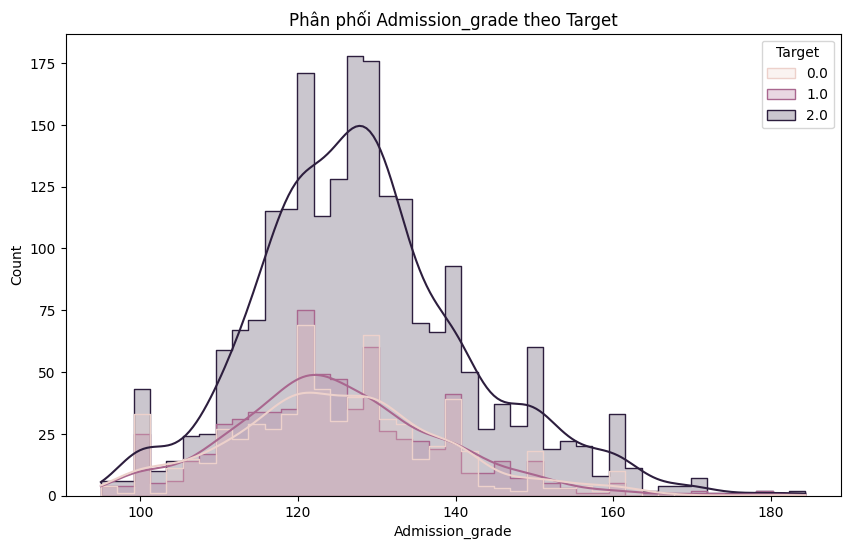

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_num, x= 'Admission_grade', hue='Target', kde=True, element="step")
plt.title(f'Phân phối Admission_grade theo Target')
plt.show()

#####Nhận xét


1.   Sinh viên tốt nghiệp (Graduate) thường có điểm Admission_grade cao hơn so với sinh viên bỏ học.
2.   Sinh viên bỏ học (Dropout) tập trung chủ yếu ở nhóm có điểm tuyển sinh thấp hơn 130.
3.   Nhóm tốt nghiệp có phân bố điểm cao hơn, đỉnh cao nhất nằm khoảng 130–140 điểm.
4.   Tuy nhiên, sự khác biệt không thực sự quá rõ nét hoàn toàn — có một số sinh viên điểm cao vẫn bỏ học và ngược lại.
5.   Điều này cho thấy điểm tuyển sinh cao có liên quan đến việc tốt nghiệp, nhưng không phải yếu tố quyết định duy nhất.






####Curricular_units_1st_sem_(grade)

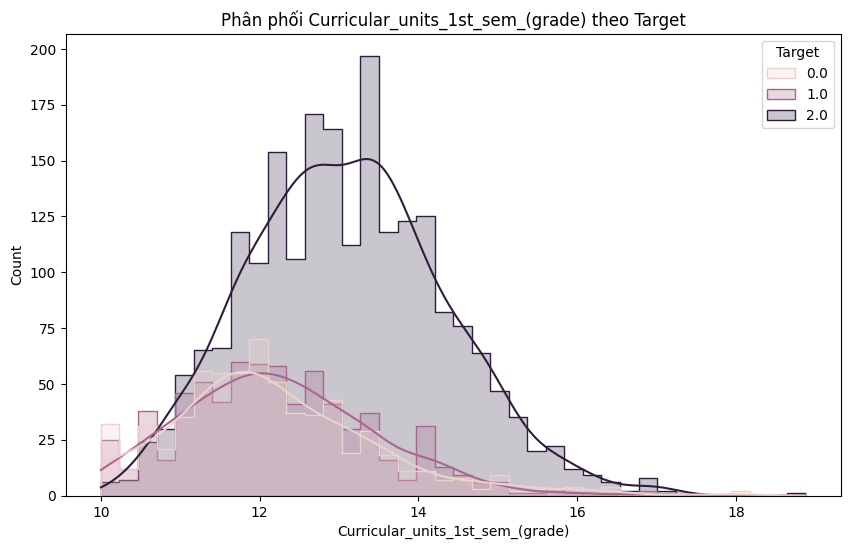

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_num, x='Curricular_units_1st_sem_(grade)', hue='Target', kde=True, element="step")
plt.title(f'Phân phối Curricular_units_1st_sem_(grade) theo Target')
plt.show()

#####Nhận xét


1.   Hơn 80% sinh viên tốt nghiệp (Graduate) có điểm học kỳ 1 trên 12.
2.   Khoảng 65% sinh viên bỏ học (Dropout) có điểm học kỳ 1 từ 10 đến 12.
3.   Vùng 12–13 là "ranh giới", nơi cả Dropout và Graduate đều xuất hiện, nhưng Graduate chiếm tỷ lệ cao hơn.
4.   Sinh viên đạt điểm dưới 11 có tỷ lệ bỏ học cao hơn rõ rệt.



####Curricular_units_2nd_sem_(grade)

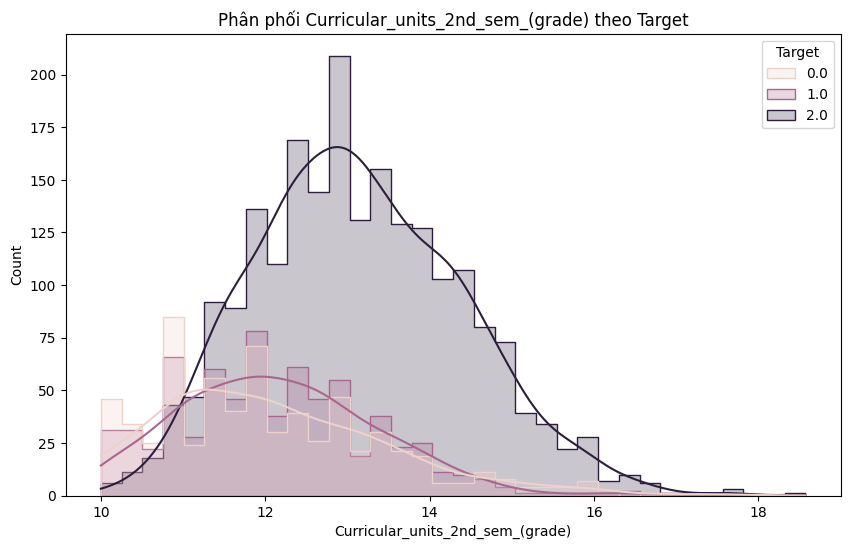

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_num, x='Curricular_units_2nd_sem_(grade)', hue='Target', kde=True, element="step")
plt.title(f'Phân phối Curricular_units_2nd_sem_(grade) theo Target')
plt.show()

#####Nhận xét


1.   Hơn 90% sinh viên tốt nghiệp (Graduate) có điểm học kỳ 2 trên 12.
2.   Khoảng 70% sinh viên bỏ học (Dropout) có điểm học kỳ 2 từ 10 đến 12.
3.   Vùng 12–13 là "ranh giới", nơi Dropout và Graduate phân tách rõ: Graduate chiếm ưu thế.
4.   Ít sinh viên bỏ học đạt trên 13 điểm.



###Phân tích chi tiết

In [ ]:
data_num.groupby('Target')[score_cols].mean()

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
Target,,,,
0.0,130.602840,125.225411,12.177481,12.098371
1.0,130.795346,125.026798,12.235641,12.161167
2.0,133.826138,128.353543,13.099519,13.143205


####Nhận xét


1.   Điểm trung bình của sinh viên tốt nghiệp cao hơn so với điểm của sinh viên bỏ học






## 5. Phân tích mối quan hệ giữa hỗ trợ tài chính và tỷ lệ bỏ học

###Xác định các biến tài chính
Trong dataset, các biến liên quan đến hỗ trợ tài chính gồm:

Tuition_fees_up_to_date: Đóng học phí đúng hạn (0: Không, 1: Có)

Scholarship_holder: Nhận học bổng (0: Không, 1: Có)

Debtor: Có nợ với trường (0: Không, 1: Có)


###Kiểm định Chi-Square cho từng cặp biến

1. Giả thuyết không (H₀) → Không có mối quan hệ giữa biến tài chính và việc bỏ học.→ Biến tài chính độc lập với khả năng bỏ học.
2. Giả thuyết đối (H₁) → Có mối quan hệ giữa biến tài chính và việc bỏ học.
→ Biến tài chính liên quan đến khả năng bỏ học.


*	Nếu p-value < 0.05 → Bác bỏ H₀ → Tài chính có ảnh hưởng đến bỏ học.
*	Nếu p-value ≥ 0.05 → Không bác bỏ H₀ → Biến tài chính không ảnh hưởng đến tỷ lệ bỏ học.


In [ ]:
# Danh sách các biến tài chính
financial_vars = ['Tuition_fees_up_to_date', 'Scholarship_holder', 'Debtor']

# Tạo biến nhị phân cho Target
target_binary = (data['Target'] == 0).astype(int)

# Khởi tạo dictionary lưu p-values
p_values = {}

# Thực hiện kiểm định Chi-Square cho từng biến
for feature in financial_vars:
    table = pd.crosstab(data[feature], target_binary)
    chi2, p, _, _ = chi2_contingency(table)
    p_values[feature] = p

# Chuyển thành Series để xử lý
p_value_series = pd.Series(p_values).sort_values()

# In ra bảng p-value
print("\n📋 Bảng p-value cho từng biến tài chính:")
for feature, p in p_value_series.items():
    print(f"{feature:<30}: {p:.10f}")

# Đánh giá ý nghĩa thống kê
print("\n=== 🔍 Đánh giá kết quả kiểm định Chi-Square ===")
significance_level = 0.05
irrelevant_cols = []

for feature in p_value_series.index:
    if p_value_series[feature] <= significance_level:
        print(f"{feature:<30} ==> ❌ Bác bỏ H0 (có liên quan đến khả năng bỏ học)")
    else:
        print(f"{feature:<30} ==> ✅ Chấp nhận H1 (không liên quan)")
        irrelevant_cols.append(feature)


📋 Bảng p-value cho từng biến tài chính:
Tuition_fees_up_to_date       : 0.0000000000
Debtor                        : 0.0000000000
Scholarship_holder            : 0.0000000000

=== 🔍 Đánh giá kết quả kiểm định Chi-Square ===
Tuition_fees_up_to_date        ==> ❌ Bác bỏ H0 (có liên quan đến khả năng bỏ học)
Debtor                         ==> ❌ Bác bỏ H0 (có liên quan đến khả năng bỏ học)
Scholarship_holder             ==> ❌ Bác bỏ H0 (có liên quan đến khả năng bỏ học)


###Phân tích bỏ học theo từng yếu tố (đơn biến)




####Tuition_fees_up_to_date

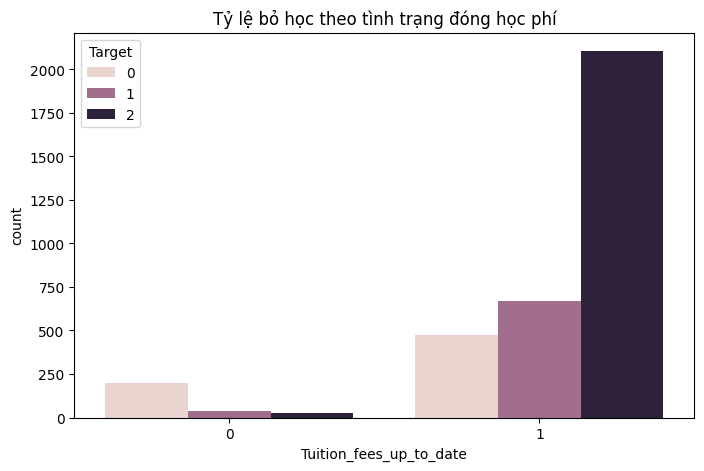

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Tuition_fees_up_to_date', hue='Target', data=data)
plt.title('Tỷ lệ bỏ học theo tình trạng đóng học phí')
plt.show()

#####Nhận xét


1.   Sinh viên không đóng học phí đúng hạn (Tuition_fees_up_to_date = 0) có tỷ lệ bỏ học >60%.
2.   Sinh viên đóng học phí đúng hạn có tỷ lệ bỏ học <20%.



####Scholarship_holder

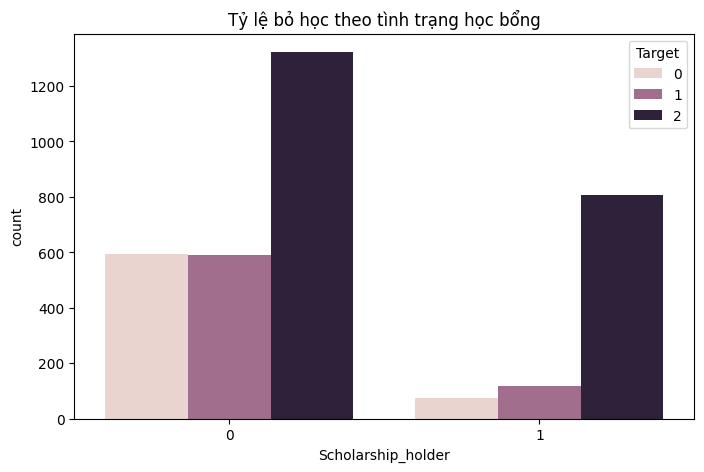

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Scholarship_holder', hue='Target', data=data)
plt.title('Tỷ lệ bỏ học theo tình trạng học bổng')
plt.show()

#####Nhận xét


1.   Sinh viên không có học bổng bỏ học nhiều hơn bỏ học (gần 35%) nhiều hơn so với có học bổng (gần 10%).




####Debtor

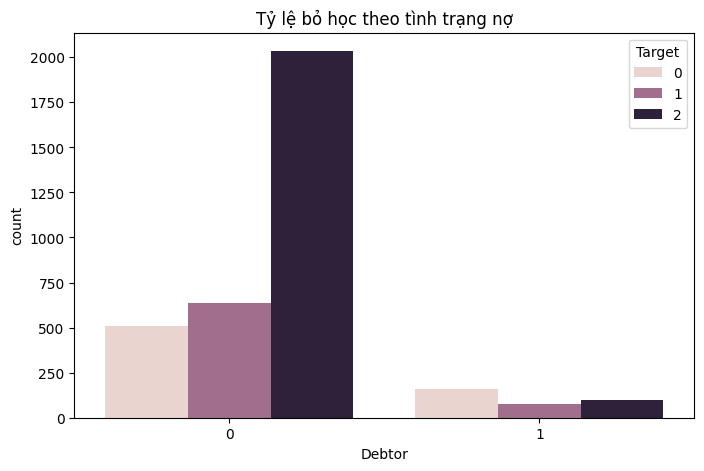

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Debtor', hue='Target', data=data)
plt.title('Tỷ lệ bỏ học theo tình trạng nợ')
plt.show()

#####Nhận xét


1.   Sinh viên mắc nợ (Debtor = 1) có tỷ lệ bỏ học >50%, trong khi không nợ chỉ ~30%..




###Phân tích đa biến (Kết hợp các yếu tố)

####Kiểm tra tương tác giữa các biến

In [ ]:
# Tạo cross-tabulation để xem tỷ lệ bỏ học khi kết hợp nhiều yếu tố
financial_crosstab = pd.crosstab(
    index=[data['Tuition_fees_up_to_date'], data['Scholarship_holder'], data['Debtor']],
    columns=data['Target'],  # 0: Dropout, 1: Enrolled, 2: Graduate
    margins=True,
    normalize='index'  # Tính tỷ lệ % theo hàng
)

# Lọc chỉ lấy tỷ lệ bỏ học (Target=0)
dropout_rates = financial_crosstab.iloc[:, 0].sort_values(ascending=False) * 100

# Chuyển dropout_rates thành DataFrame và đặt tên cột
dropout_rates_df = pd.DataFrame(dropout_rates).reset_index()
dropout_rates_df.columns = ['Đóng học phí', 'Học bổng', 'Nợ', 'Tỷ lệ bỏ học']

# Hiển thị bảng
dropout_rates_df


,Đóng học phí,Học bổng,Nợ,Tỷ lệ bỏ học
0,0,0,1,83.760684
1,0,0,0,75.454545
2,0,1,1,61.538462
3,0,1,0,36.842105
4,1,0,1,32.679739
5,All,,,19.065261
6,1,0,0,17.027281
7,1,1,1,8.163265
8,1,1,0,6.182213


#####Nhận xét


1.   Sinh viên không đóng học phí + không học bổng + có nợ có nguy cơ bỏ học cao nhất

###Trực quan hóa với heatmap

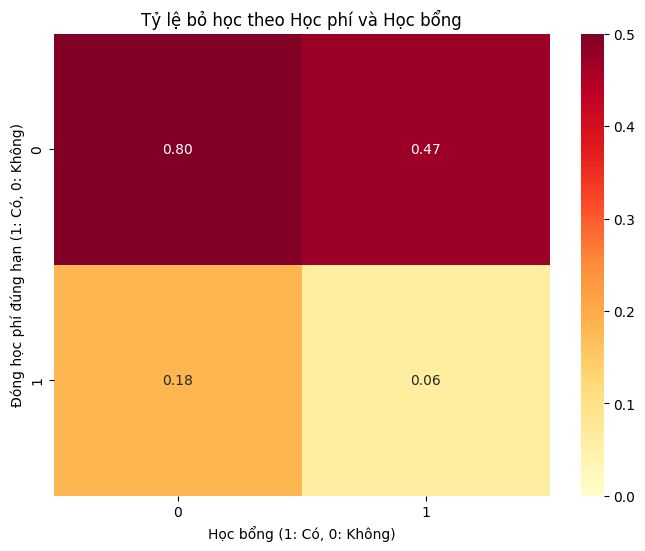

In [ ]:
# Tạo bảng pivot để sử dụng cho heatmap
heatmap_data = data.groupby(['Tuition_fees_up_to_date', 'Scholarship_holder'])['Target'].apply(lambda x: (x == 0).mean()).reset_index()

# Tạo heatmap pivot đúng cách
heatmap_pivot = heatmap_data.pivot(index="Tuition_fees_up_to_date", columns="Scholarship_holder", values="Target")

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlOrRd", vmin=0, vmax=0.5)
plt.title('Tỷ lệ bỏ học theo Học phí và Học bổng')
plt.xlabel('Học bổng (1: Có, 0: Không)')
plt.ylabel('Đóng học phí đúng hạn (1: Có, 0: Không)')
plt.show()


#####Nhận xét



1.   Không đóng phí + không học bổng → Tỷ lệ bỏ học cao nhất
2.   Đóng phí + có học bổng → Tỷ lệ bỏ học thấp nhất



## 6. Dự đoán kết quả học tập của sinh viên dựa trên các yếu tố đầu vào.






In [ ]:
data.drop(['Previous_qualification_(grade)', 'Admission_grade','Curricular_units_1st_sem_(grade)',
           'Curricular_units_2nd_sem_(grade)'], axis = 1, inplace = True)

In [ ]:
# Chuyển đổi biến mục tiêu thành dữ liệu số
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

data['Target'] = le.fit_transform(data['Target'])

In [ ]:
# Tách biến đầu vào và biến mục tiêu
X = data.drop('Target', axis=1)
y = data['Target']

In [ ]:
# Cân bằng dữ liệu bằng SMOTE (giúp mô hình học đều các lớp)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

Chuẩn bị dữ liệu để mô hình có thể học dự đoán Target (kết quả học tập của sinh viên).

## 7. Sử dụng mô hình phân lớp để phân loại sinh viên vào 3 nhóm (bỏ học, đang học, tốt nghiệp).

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import Pool, CatBoostClassifier, cv
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

###Naive Bayes Clssifier

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

# Đưa ra dự đoán
y_pred_nb = NB.predict(X_test)

# Đánh giá
print("Accuracy Score: ", accuracy_score(y_test, y_pred_nb))
print("F1-Score: ", f1_score(y_test, y_pred_nb, average= None))
print(classification_report(y_test, y_pred_nb))

Accuracy Score:  0.6410256410256411
F1-Score:  [0.4765625  0.3655914  0.77790564]
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       128
           1       0.40      0.34      0.37       150
           2       0.76      0.80      0.78       424

    accuracy                           0.64       702
   macro avg       0.54      0.54      0.54       702
weighted avg       0.63      0.64      0.63       702



###Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Đưa ra dự đoán
y_pred_dt = dt.predict(X_test)

# Đánh giá
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt, average= None))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.6595441595441596
F1-Score:  [0.48559671 0.40390879 0.80093677]
              precision    recall  f1-score   support

           0       0.51      0.46      0.49       128
           1       0.39      0.41      0.40       150
           2       0.80      0.81      0.80       424

    accuracy                           0.66       702
   macro avg       0.57      0.56      0.56       702
weighted avg       0.66      0.66      0.66       702



###Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Đưa ra dự đoán
y_pred_rf = rf.predict(X_test)

# Đánh giá
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("F1-Score: ", f1_score(y_test, y_pred_rf, average= None))
print(classification_report(y_test, y_pred_rf))

Accuracy Score:  0.7507122507122507
F1-Score:  [0.58823529 0.49253731 0.86051502]
              precision    recall  f1-score   support

           0       0.79      0.47      0.59       128
           1       0.56      0.44      0.49       150
           2       0.79      0.95      0.86       424

    accuracy                           0.75       702
   macro avg       0.71      0.62      0.65       702
weighted avg       0.74      0.75      0.73       702



###Extreme Gradient Boosting Classifier (XG Boost)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Đưa ra dự đoán
y_pred_xgb = xgb.predict(X_test)

# Đánh giá
print("Accuracy Score: ", accuracy_score(y_test, y_pred_xgb))
print("F1-Score: ", f1_score(y_test, y_pred_xgb, average= None))
print(classification_report(y_test, y_pred_xgb))

Accuracy Score:  0.7521367521367521
F1-Score:  [0.60633484 0.50724638 0.86218302]
              precision    recall  f1-score   support

           0       0.72      0.52      0.61       128
           1       0.56      0.47      0.51       150
           2       0.81      0.92      0.86       424

    accuracy                           0.75       702
   macro avg       0.70      0.64      0.66       702
weighted avg       0.74      0.75      0.74       702



###LightGBM Classifier

In [ ]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

# Đưa ra dự đoán
lgb_predict = lgb.predict(X_test)

# Đánh giá

print("Accuracy Score: ", accuracy_score(y_test, lgb_predict))
print("F1-Score: ", f1_score(y_test, lgb_predict, average= None))
print(classification_report(y_test, lgb_predict))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 2807, number of used features: 28
[LightGBM] [Info] Start training from score -1.646452
[LightGBM] [Info] Start training from score -1.613722
[LightGBM] [Info] Start training from score -0.497379
Accuracy Score:  0.7564102564102564
F1-Score:  [0.61187215 0.53090909 0.85934066]
              precision    recall  f1-score   support

           0       0.74      0.52      0.61       128
           1       0.58      0.49      0.53       150
           2       0.80      0.92      0.86       424

    accuracy                           0.76       702
   macro avg       0.71      0.64      0.67       702
weighted avg       0.74      0.76      0.74       702



###CatBoost Classifier

In [ ]:
model = CatBoostClassifier(random_seed = 350, iterations=500)
model.fit(X_train, y_train,verbose=False)

# Lưu mô hình CatBoost ra file
model.save_model('catboost_model.cbm')

# Đưa ra dự đoán
cat_predict = model.predict(X_test)

# Đánh giá
print("Accuracy Score: ", accuracy_score(y_test, cat_predict))
print("F1-Score: ", f1_score(y_test, cat_predict, average= None))
print(classification_report(y_test, cat_predict))

Accuracy Score:  0.7592592592592593
F1-Score:  [0.63392857 0.5093633  0.86308872]
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       128
           1       0.58      0.45      0.51       150
           2       0.81      0.93      0.86       424

    accuracy                           0.76       702
   macro avg       0.71      0.65      0.67       702
weighted avg       0.75      0.76      0.75       702



## 8. So sánh hiệu quả của các mô hình phân lớp khác nhau

In [ ]:
## So sánh
Models = pd.DataFrame({'Classifiers':['DecisionTree', 'XGBoost','LightGBM','RandomForest','CatBoost'], 'Accuracy':
 [accuracy_score(y_test, y_pred_dt)*100,
  accuracy_score(y_test, y_pred_xgb)*100,
  accuracy_score(y_test, lgb_predict)*100,
  accuracy_score(y_test, y_pred_rf)*100,
  accuracy_score(y_test, cat_predict)*100]})

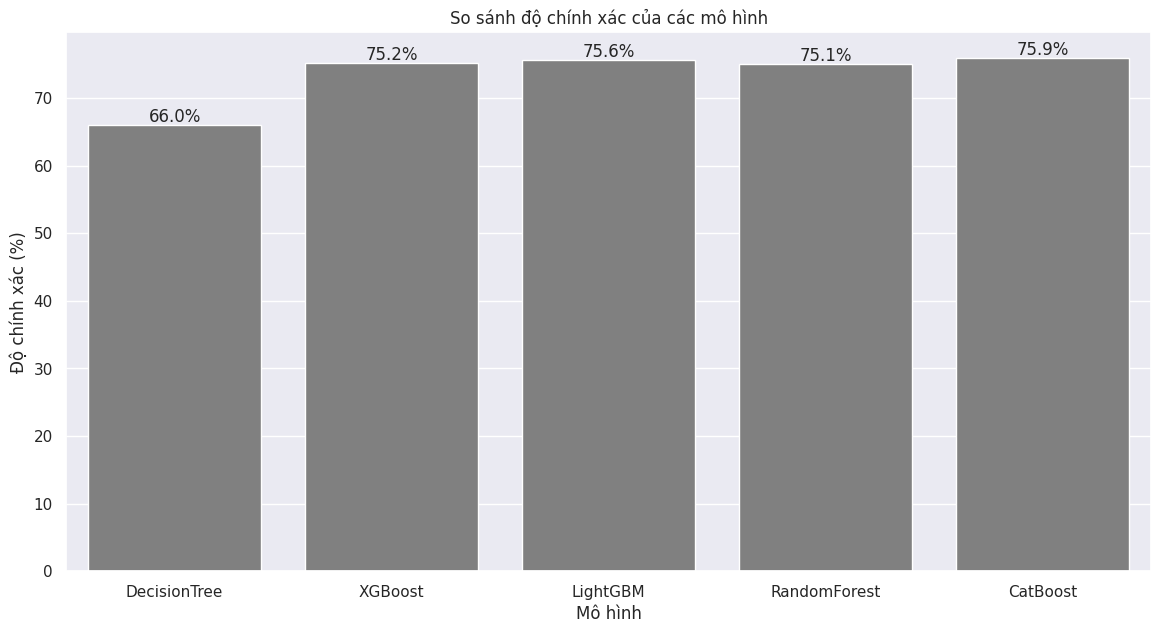

In [ ]:
plt.figure(figsize=(14,7))
sns.set()
ax = sns.barplot(data=Models, x='Classifiers', y='Accuracy', color="gray")

# Thêm phần trăm lên từng cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.5,
            '{:.1f}%'.format(height),
            ha="center")

plt.title('So sánh độ chính xác của các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác (%)')
plt.show()

Sau khi huấn luyện và so sánh hiệu suất của nhiều mô hình phân loại (Decision Tree, Random Forest, XGBoost, LightGBM, CatBoost), nhận thấy CatBoost là mô hình có độ chính xác cao nhất trong việc phân loại sinh viên vào 3 nhóm:

0: Bỏ học (Dropout)

1: Đang học (Enrolled)

2: Tốt nghiệp (Graduate)

Do đó, việc phân tích sâu mô hình tốt nhất – cụ thể là qua ma trận nhầm lẫn (confusion matrix) – là cần thiết để:


1.   Đánh giá chi tiết cách mô hình phân biệt các lớp
2.   Phát hiện lớp nào dễ bị dự đoán sai → đặc biệt quan trọng với lớp “bỏ học” vì đó là nhóm mục tiêu chính của đề tài
3.   Hiểu sai lệch của mô hình (bias), từ đó đề xuất biện pháp hỗ trợ phù hợp











Text(153.75, 0.5, 'Truth')

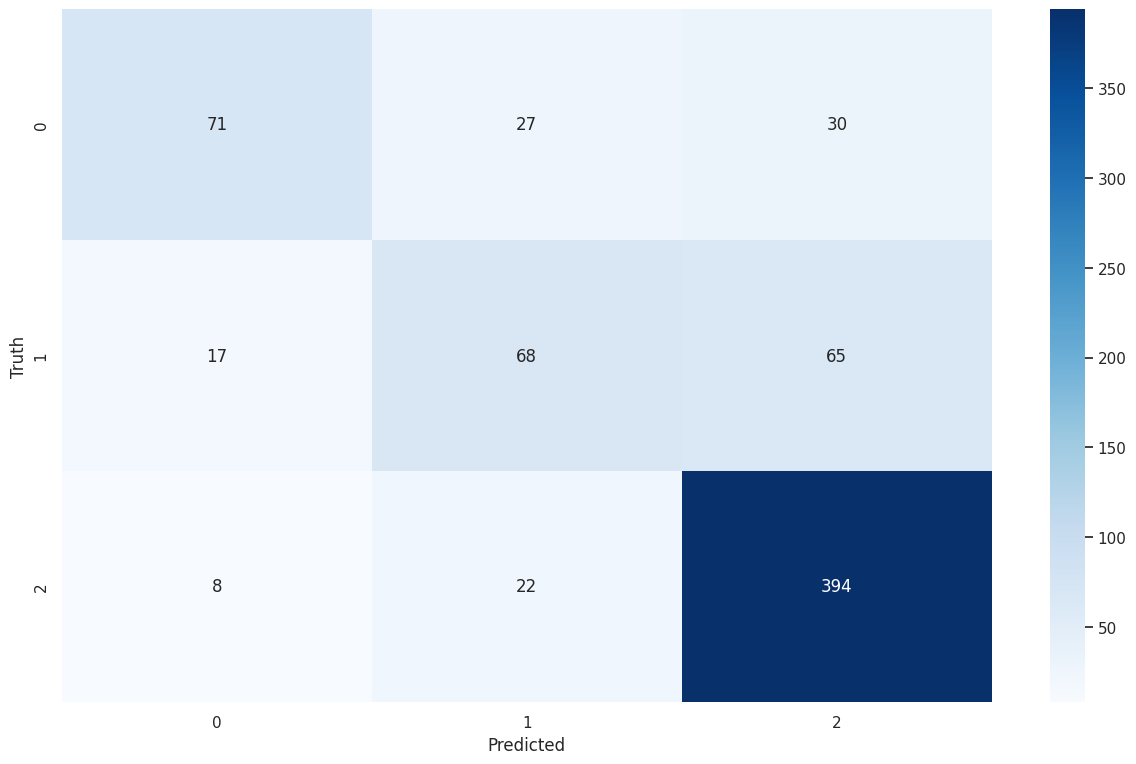

In [ ]:
# Vẽ Ma trận nhầm lẫn
cm = confusion_matrix(y_test, cat_predict)

plt.figure(figsize = (15, 9))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

###Nhận xét


1.   Mô hình CatBoost phân biệt tốt nhóm “Tốt nghiệp”, nhưng gặp khó khăn khi phân biệt “Bỏ học” và “Đang học”.





## 9. Tìm hiểu sự ảnh hưởng của môi trường xã hội đến kết quả học tập của sinh viên.

###Xác định các biến yếu tố môi trường xã hội


1.   Mother's_occupation
2.   Father's_occupation
3.   Mother's_qualification
4.   Father's_qualification
5.   Nacionality
6.   Displaced (Có phải di dân không)   






In [ ]:
# Danh sách các biến môi trường xã hội muốn kiểm định
social_vars = [
    "Mother's_occupation", "Father's_occupation",
    "Mother's_qualification", "Father's_qualification",
    'Nacionality', 'Displaced'
]

In [ ]:
target_binary = (data['Target'] == 0).astype(int)

###Giả thuyết
Kiểm tra xem các yếu tố thuộc về môi trường xã hội của sinh viên (như nghề nghiệp, trình độ học vấn của cha mẹ, quốc tịch, tình trạng di cư) có ảnh hưởng đến khả năng bỏ học hay không.


1.    Giả thuyết không (H₀): Biến xã hội không có ảnh hưởng đến khả năng bỏ học. (Không có sự khác biệt rõ ràng về tỷ lệ bỏ học giữa các nhóm trong biến đó) → Biến xã hội độc lập với khả năng bỏ học.
2.   Giả thuyết đối lập (H₁): Biến xã hội có ảnh hưởng đến khả năng bỏ học.
(Tỷ lệ bỏ học khác biệt rõ ràng giữa các nhóm trong biến đó)
→ Biến xã hội liên quan đến khả năng bỏ học.



In [ ]:
# Khởi tạo dictionary lưu p-values
p_values_social = {}

# Thực hiện kiểm định Chi-Square cho từng biến xã hội
for feature in social_vars:
    table = pd.crosstab(data[feature], target_binary)
    chi2, p, _, _ = chi2_contingency(table)
    p_values_social[feature] = p

# Chuyển thành Series để xử lý
p_value_series_social = pd.Series(p_values_social).sort_values()

# In ra bảng p-value
print("\n📋 Bảng p-value cho từng biến xã hội:")
for feature, p in p_value_series_social.items():
    print(f"{feature:<30}: {p:.10f}")

# Đánh giá ý nghĩa thống kê
print("\n=== 🔍 Đánh giá kết quả kiểm định Chi-Square cho các biến xã hội ===")
significance_level = 0.05
irrelevant_social_cols = []

for feature in p_value_series_social.index:
    if p_value_series_social[feature] <= significance_level:
        print(f"{feature:<30} ==> ❌ Bác bỏ H₀ (có liên quan đến khả năng bỏ học)")
    else:
        print(f"{feature:<30} ==> ✅ Không bác bỏ H₀ (không liên quan)")
        irrelevant_social_cols.append(feature)




📋 Bảng p-value cho từng biến xã hội:
Mother's_qualification        : 0.0000000000
Father's_qualification        : 0.0000000001
Mother's_occupation           : 0.0000615571
Displaced                     : 0.0028864525
Father's_occupation           : 0.0035955780
Nacionality                   : 0.4389707481

=== 🔍 Đánh giá kết quả kiểm định Chi-Square cho các biến xã hội ===
Mother's_qualification         ==> ❌ Bác bỏ H₀ (có liên quan đến khả năng bỏ học)
Father's_qualification         ==> ❌ Bác bỏ H₀ (có liên quan đến khả năng bỏ học)
Mother's_occupation            ==> ❌ Bác bỏ H₀ (có liên quan đến khả năng bỏ học)
Displaced                      ==> ❌ Bác bỏ H₀ (có liên quan đến khả năng bỏ học)
Father's_occupation            ==> ❌ Bác bỏ H₀ (có liên quan đến khả năng bỏ học)
Nacionality                    ==> ✅ Không bác bỏ H₀ (không liên quan)


In [ ]:
print("\nCác biến xã hội không có ý nghĩa thống kê và có thể loại bỏ nếu cần:")
if irrelevant_social_cols:
    for col in irrelevant_social_cols:
        print(f"- {col}")
else:
    print("Không có biến nào cần loại bỏ.")


Các biến xã hội không có ý nghĩa thống kê và có thể loại bỏ nếu cần:
- Nacionality


## 10. Xác định các yếu tố chính làm tăng nguy cơ bỏ học.

###Tại sao lấy model CatBoost
Trong phần so sánh giữa các mô hình với nhau thì CatBoost cho độ chính xác cao nhất → tức là mô hình này hiểu dữ liệu tốt nhất → việc giải thích dựa trên CatBoost cũng đáng tin cậy nhất.

In [ ]:
# Lấy độ quan trọng của các đặc trưng từ CatBoost
importances = model.get_feature_importance()
feature_names = X.columns

In [ ]:
# Tạo DataFrame xếp hạng
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

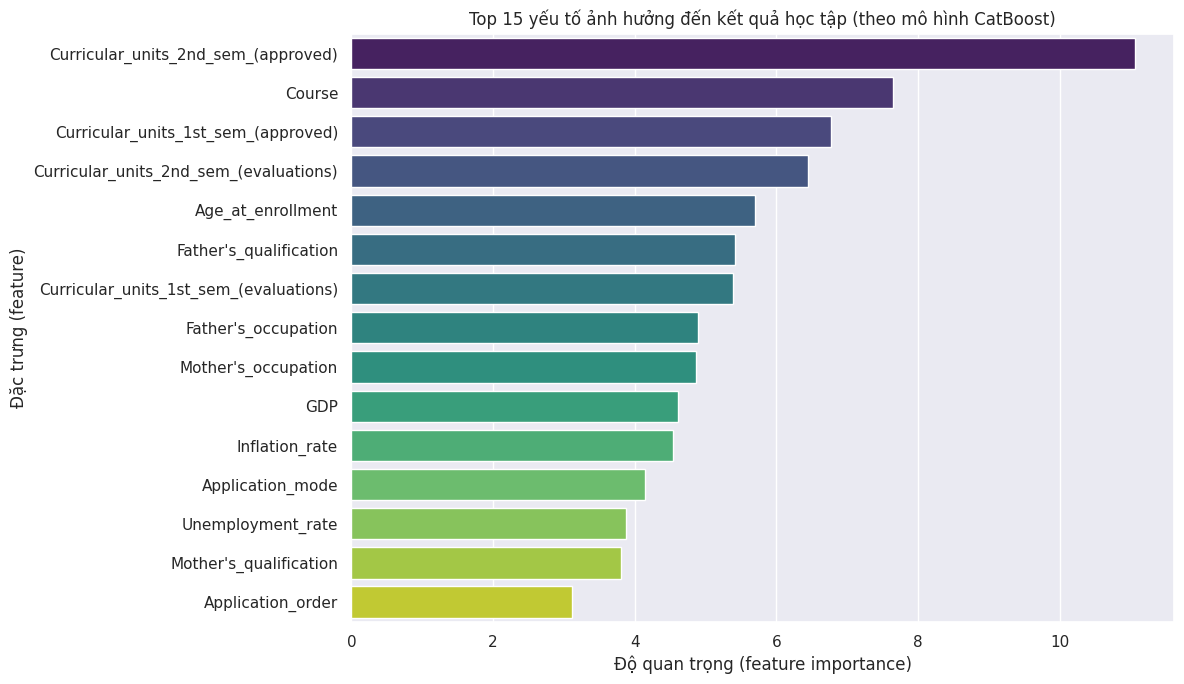

In [ ]:
# Vẽ biểu đồ top 15 đặc trưng
plt.figure(figsize=(12, 7))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 yếu tố ảnh hưởng đến kết quả học tập (theo mô hình CatBoost)")
plt.xlabel("Độ quan trọng (feature importance)")
plt.ylabel("Đặc trưng (feature)")
plt.tight_layout()
plt.show()

In [ ]:
feat_imp_df.head(15)

,Feature,Importance
23,Curricular_units_2nd_sem_(approved),11.058608
2,Course,7.644655
18,Curricular_units_1st_sem_(approved),6.766542
22,Curricular_units_2nd_sem_(evaluations),6.439825
14,Age_at_enrollment,5.692902
6,Father's_qualification,5.420067
17,Curricular_units_1st_sem_(evaluations),5.392659
8,Father's_occupation,4.892778
7,Mother's_occupation,4.861352
27,GDP,4.614530


###Kết luận

1.   Số môn được phê duyệt ở học kỳ 2
→ Sinh viên có số môn đạt thấp ở học kỳ 2 có nguy cơ bỏ học cao.
2.   Ngành học
→ Một số ngành có tỷ lệ bỏ học cao hơn đáng kể so với các ngành khác.
3. Số môn được phê duyệt ở học kỳ 1
→ Học kỳ đầu tiên là giai đoạn sàng lọc quan trọng; nếu kết quả học tập kém ở giai đoạn này, nguy cơ bỏ học sẽ tăng cao.
4. Số lượng bài đánh giá ở học kỳ 2
→ Ít bài đánh giá có thể cho thấy sinh viên không tham gia đầy đủ, làm tăng nguy cơ bỏ học.
5. Tuổi nhập học
→ Sinh viên lớn tuổi hơn có xu hướng bỏ học cao hơn, có thể do áp lực cá nhân, công việc, hoặc khó thích nghi với môi trường học thuật.
6. Trình độ học vấn và nghề nghiệp của cha mẹ
→ Trình độ thấp và nghề nghiệp không ổn định của cha mẹ (đặc biệt là cha) có liên quan đến tỷ lệ bỏ học cao hơn, thể hiện ảnh hưởng của yếu tố xã hội.
7. Tình trạng kinh tế xã hội
→ Các yếu tố như GDP, tỷ lệ lạm phát, và tỷ lệ thất nghiệp cũng góp phần ảnh hưởng đến quyết định học tiếp hay bỏ học của sinh viên.

